In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
# import kagglehub
# ranzeet013_cervical_cancer_dataset_path = kagglehub.dataset_download('ranzeet013/cervical-cancer-dataset')

# KaggleURL : https://www.kaggle.com/datasets/ranzeet013/cervical-cancer-dataset


In [ ]:
!pip install tensorflow pydot graphviz


In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import joblib
import cv2
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import plot_model


In [ ]:
df = pd.read_csv('/content/cervical-cancer_csv.csv')
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
#Checks null values
df = df.replace('?', np.NaN)
print(df.isnull().sum())
print('Total number of null values: ',df.isnull().sum().sum())
#Drops two columns of STDs
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)
numerical_df = ['Age', 'Number of sexual partners', \
'First sexual intercourse','Num of pregnancies', \
'Smokes (years)', 'Smokes (packs/year)',\
'Hormonal Contraceptives (years)','IUD (years)',\
'STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD',\
'STDs', 'STDs:condylomatosis','STDs:cervical condylomatosis',\
'STDs:vaginal condylomatosis',\
'STDs:vulvo-perineal condylomatosis','STDs:syphilis',\
'STDs:pelvic inflammatory disease', 'STDs:genital herpes',\
'STDs:molluscum contagiosum', 'STDs:AIDS', \
'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', \
'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN',\
'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology',
'Biopsy']
#Fills the missing values of numeric data columns with mean of the column data.
for feature in numerical_df:
    print(feature,'',df[feature].apply(pd.to_numeric,errors='coerce').mean())
    feature_mean = round(df[feature].apply(pd.to_numeric, errors='coerce').mean(),1)
    df[feature] = df[feature].fillna(feature_mean)
for feature in categorical_df:
    df[feature] = df[feature].apply(pd.to_numeric, \
    errors='coerce').fillna(1.0)

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [ ]:
X = df.drop('Biopsy', axis =1).apply(pd.to_numeric, errors='coerce').astype('float64')
y = df["Biopsy"]
sm = SMOTE(random_state=42)
X,y = sm.fit_resample(X, y.ravel())
#Splits the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2021, stratify=y)
#Standar scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Building, Compiling, and Training ANN Model

In [ ]:
#Imports Tensorflow and create a Sequential Model to add layer for the ANN
ann = tf.keras.models.Sequential()
#Input layer
ann.add(tf.keras.layers.Dense(units=500,input_dim=33,kernel_initializer='uniform',activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))
#Hidden layer 1
ann.add(tf.keras.layers.Dense(units=200, kernel_initializer='uniform',activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))
#Output layer
ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
print(ann.summary()) #for showing the structure and parameters
#Compiles the ANN using ADAM optimizer.
ann.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
#Trains the ANN with 100 epochs.
history = ann.fit(X_train, y_train, batch_size = 64,validation_split=0.20, epochs = 250, shuffle=True)
#Saves model
ann.save('cervical_model.h5')
#Saves history into npy file
np.save('cervical_history.npy', history.history)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │          17,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,401 (458.60 KB)

 Trainable params: 117,401 (458.60 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7416 - loss: 0.6450 - val_accuracy: 0.8840 - val_loss: 0.4324
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8830 - loss: 0.3679 - val_accuracy: 0.9480 - val_loss: 0.1842
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9244 - loss: 0.2105 - val_accuracy: 0.9560 - val_loss: 0.1256
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9666 - loss: 0.1242 - val_accuracy: 0.9720 - val_loss: 0.0946
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9706 - loss: 0.1235 - val_accuracy: 0.9760 - val_loss: 0.0833
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9694 - loss: 0.1115 - val_accuracy: 0.9800 - val_loss: 0.0876
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9603 - loss: 0.1335 - val_accuracy: 0.9760 - val_loss: 0.0668
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9758 - loss: 0.0958 - val_accuracy: 0.98

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │          17,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,205 (1.34 MB)

 Trainable params: 117,401 (458.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 234,804 (917.21 KB)

None


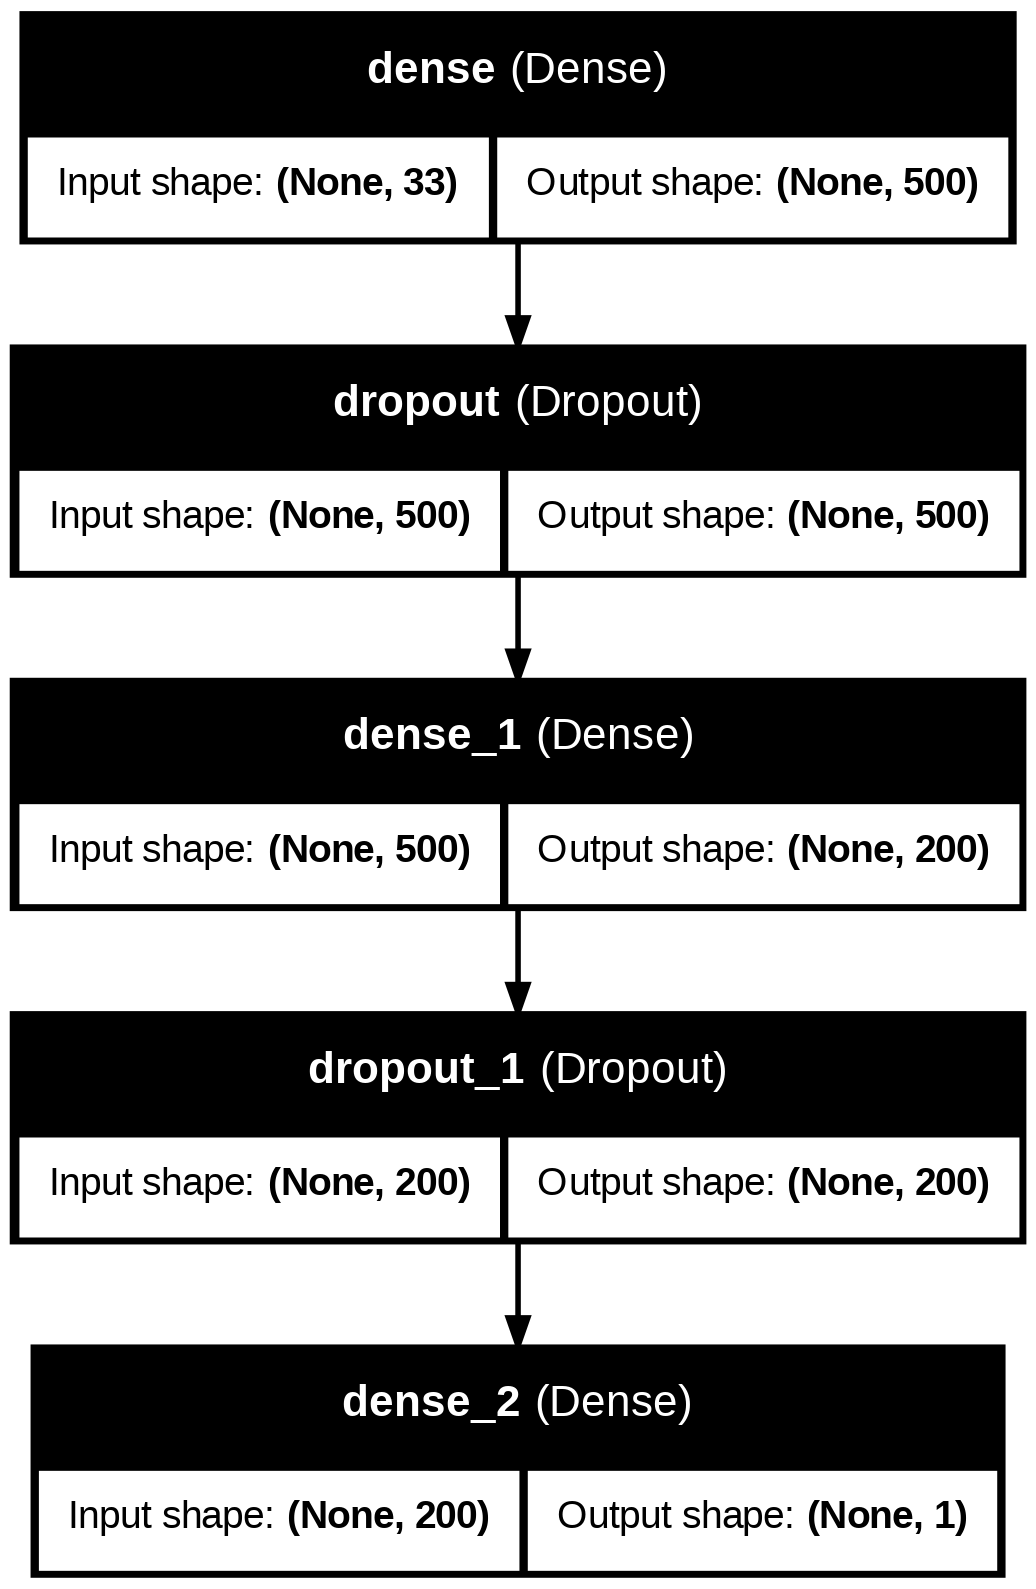

In [28]:
# Display model summary
print(ann.summary())

# Visualize and save the architecture as an image
plot_model(ann, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, expand_nested=True)

# # To display the image inline (if running in a Jupyter Notebook)
# from IPython.display import Image
# Image('model_architecture.png')

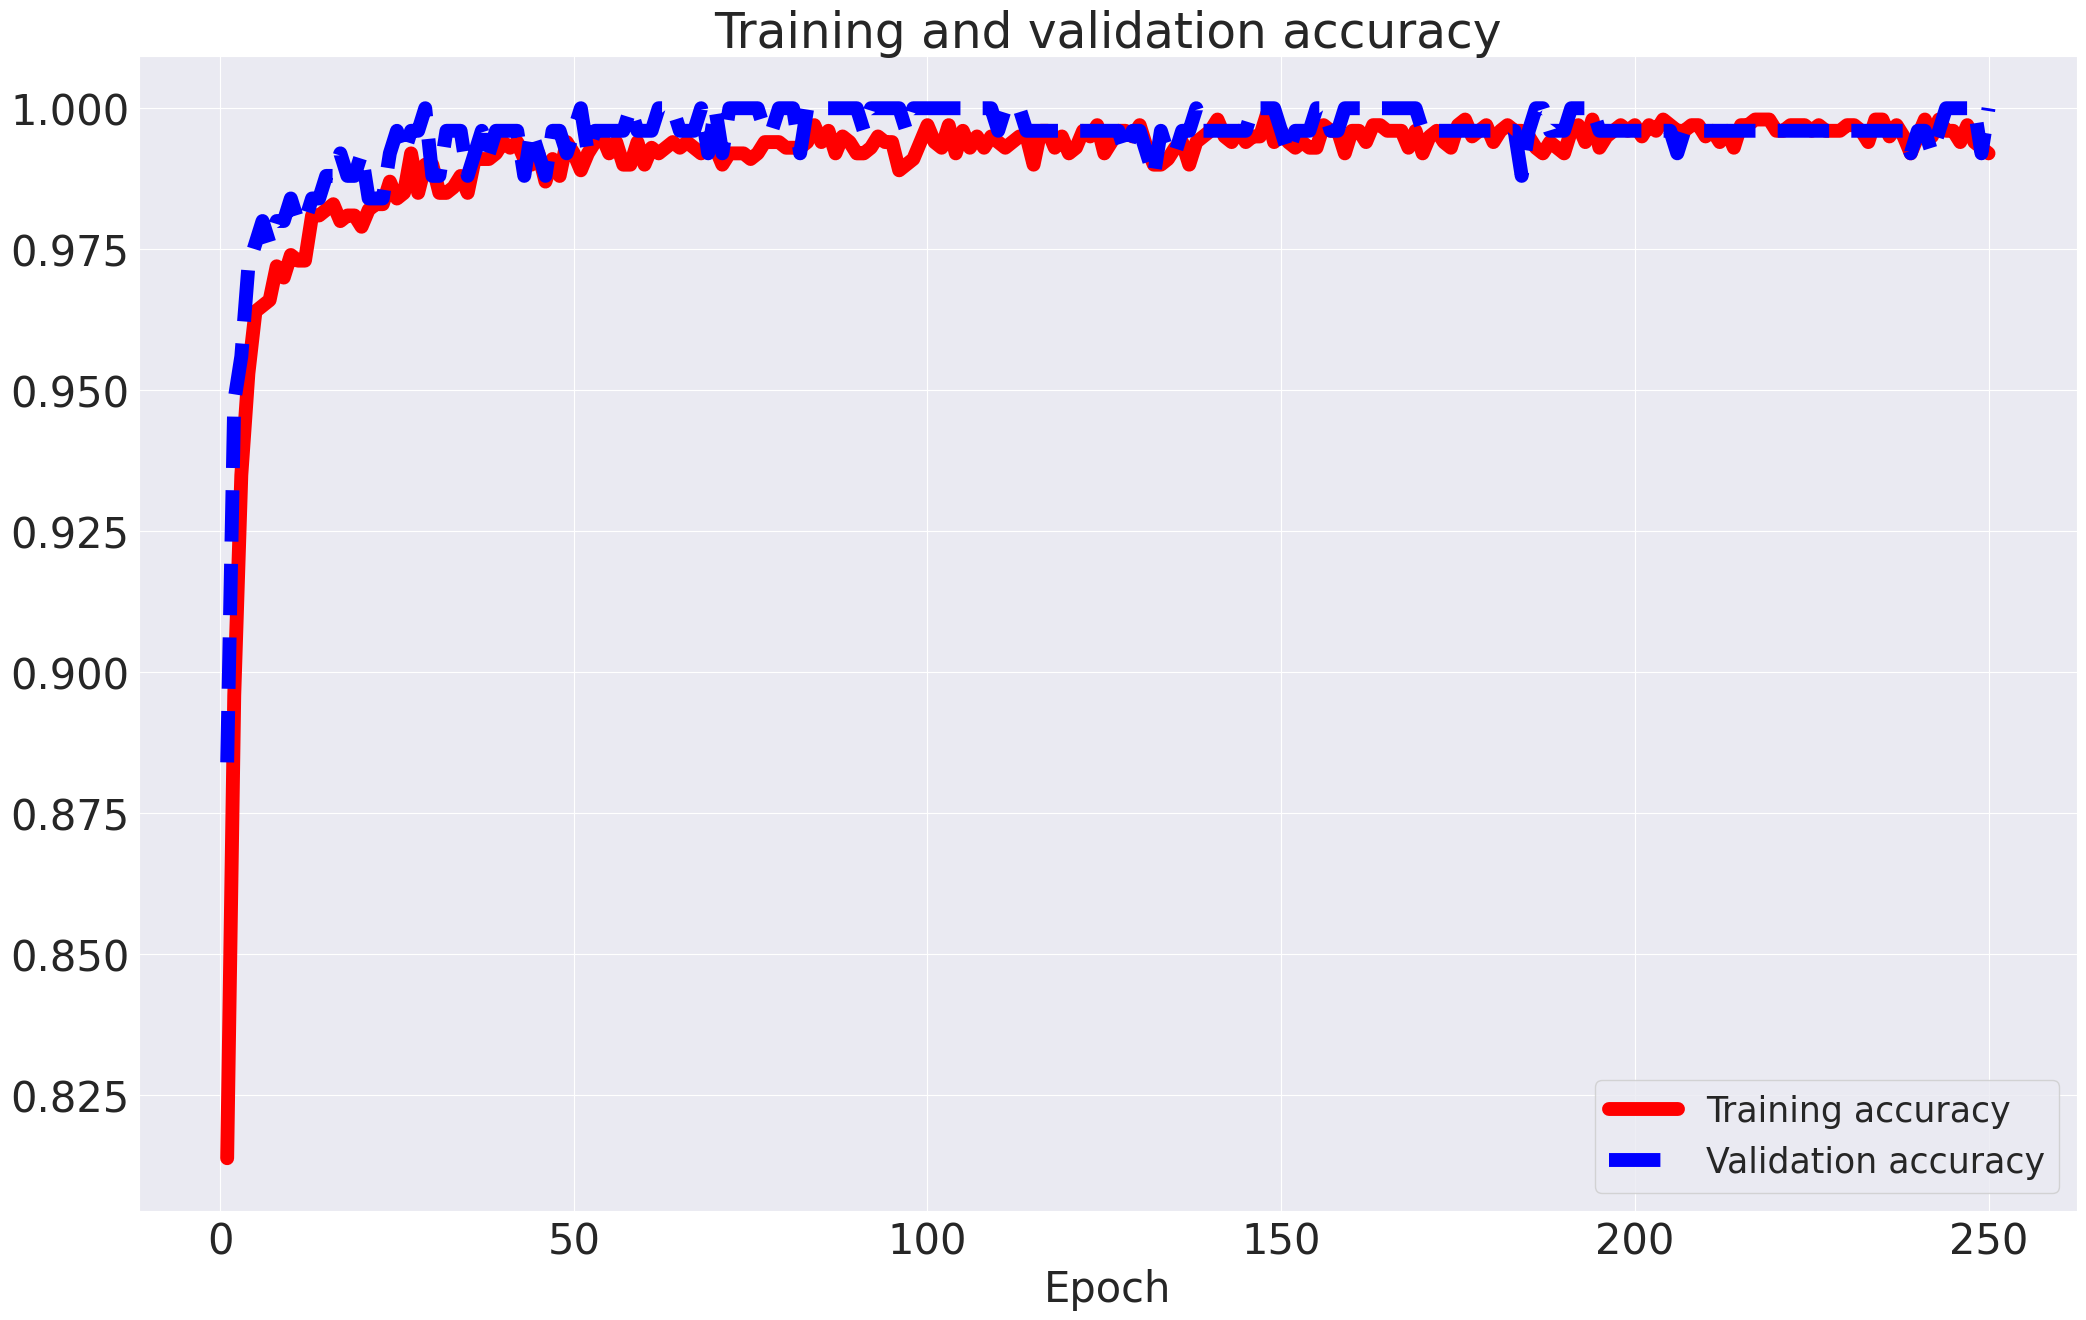

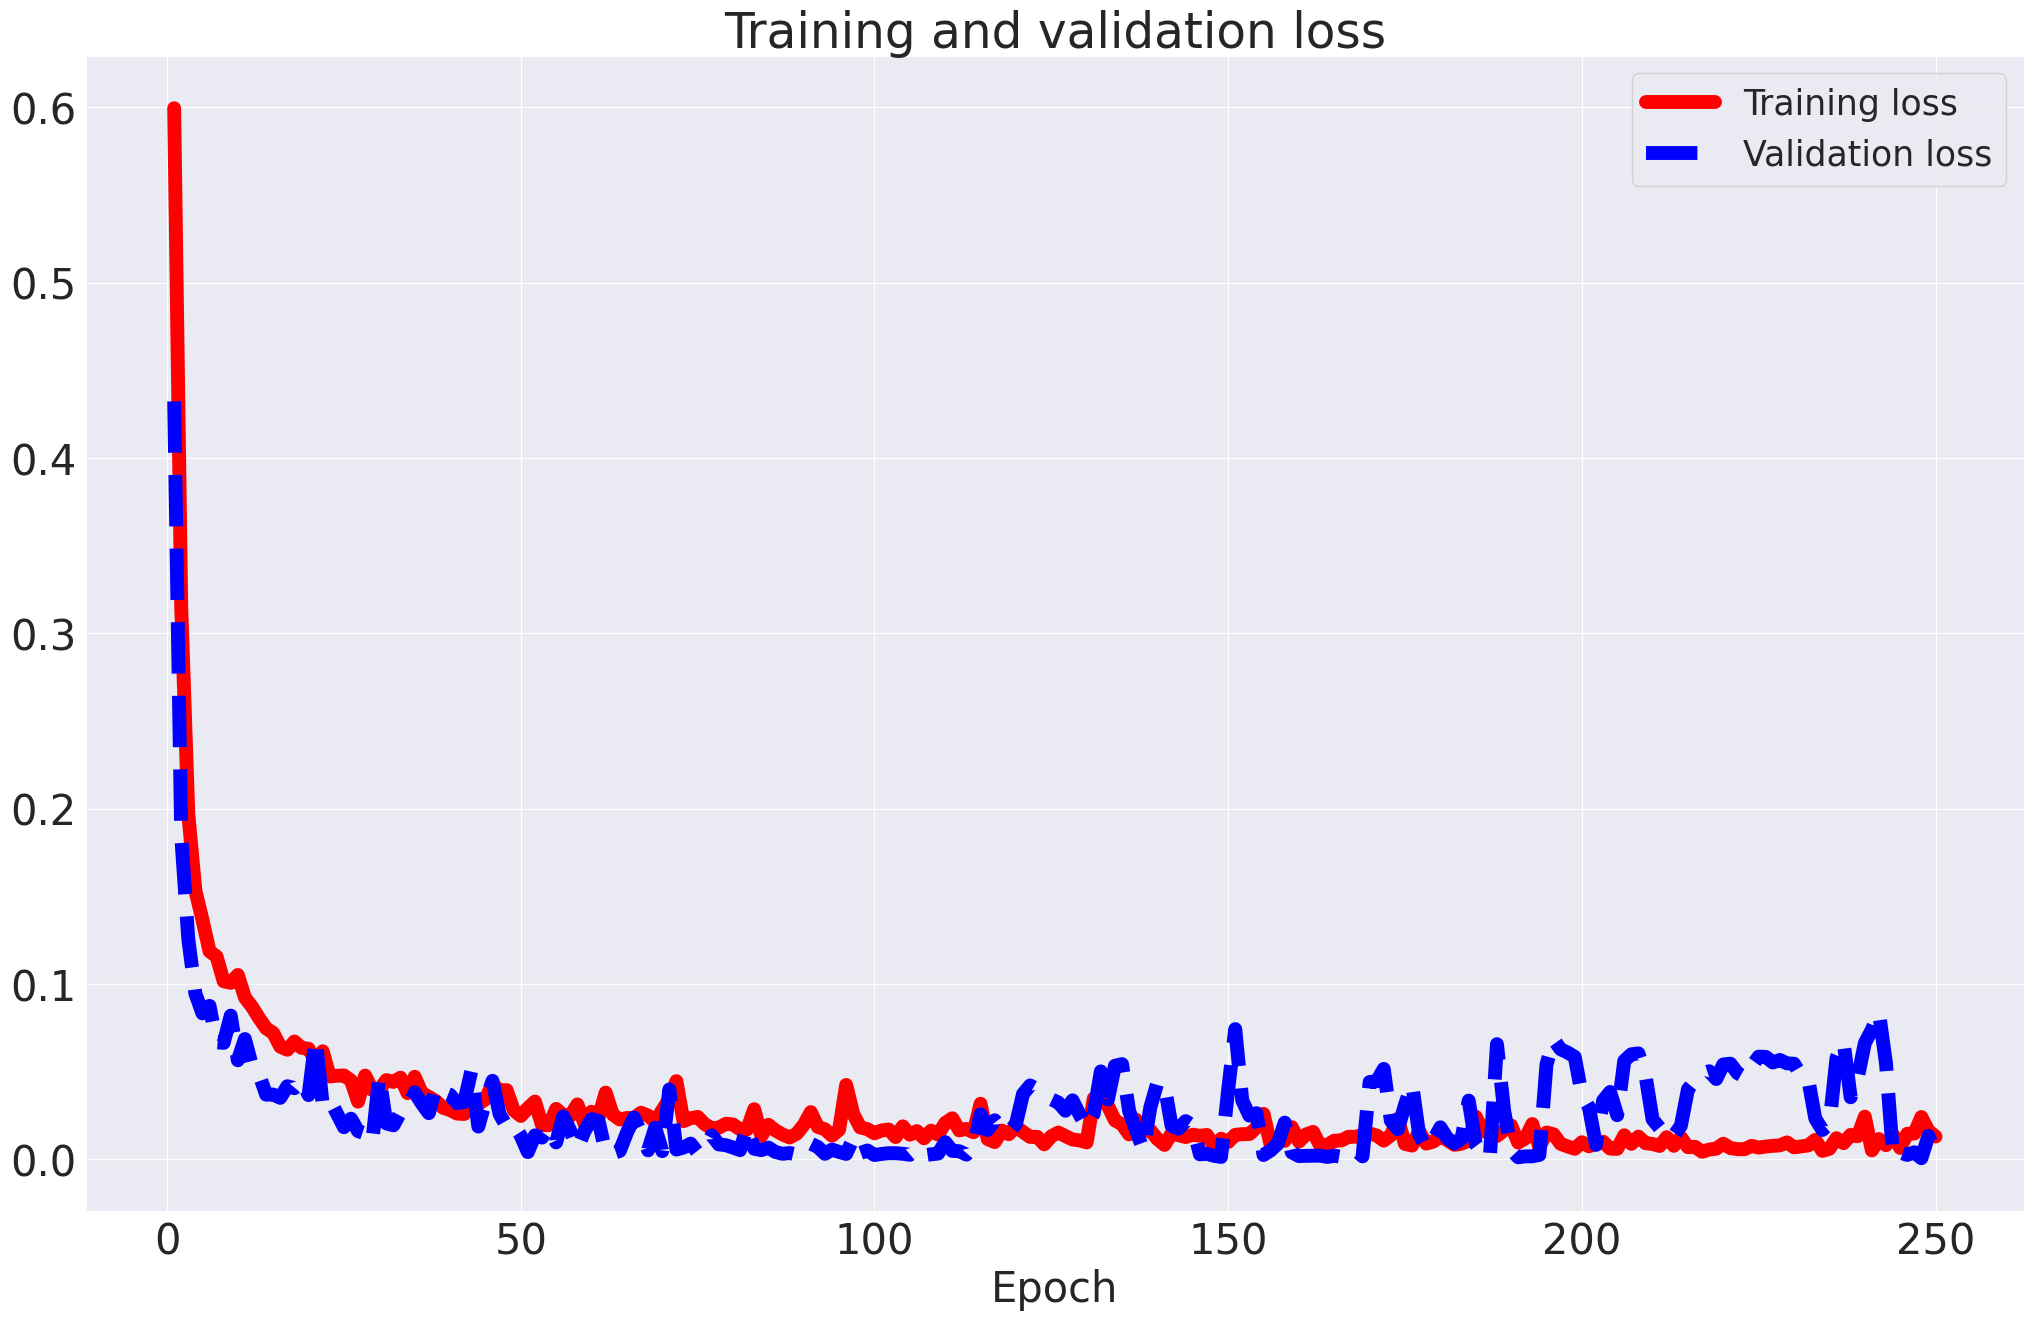

In [ ]:
#Plots accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#accuracy
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, acc, 'r', label='Training accuracy',lw=10)
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy', lw=10)
plt.title('Training and validation accuracy',fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
#loss
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, loss, 'r', label='Training loss', lw=10)
plt.plot(epochs, val_loss, 'b--', label='Validation loss',lw=10)
plt.title('Training and validation loss', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()

In [ ]:
#Sets the threshold for the predictions.
#In this case, the threshold is 0.5 (this value can be modified).
#prediction on test set
y_pred = ann.predict(X_test)
y_pred = [int(p>=0.5) for p in y_pred]
print(y_pred)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]


In [ ]:
#Performance Evaluation - Accuracy and Classification Report
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(y_pred, y_test, normalize=True), '\n')
#precision, recall report
print ('Classification Report :\n\n' ,classification_report(y_pred, y_test))

Accuracy Score :  0.9904153354632588 

Classification Report :

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.99      0.99      0.99       157

    accuracy                           0.99       313
   macro avg       0.99      0.99      0.99       313
weighted avg       0.99      0.99      0.99       313



[Text(0, 0.5, 'Biopsy = 0'), Text(0, 1.5, 'Biopsy = 1')]

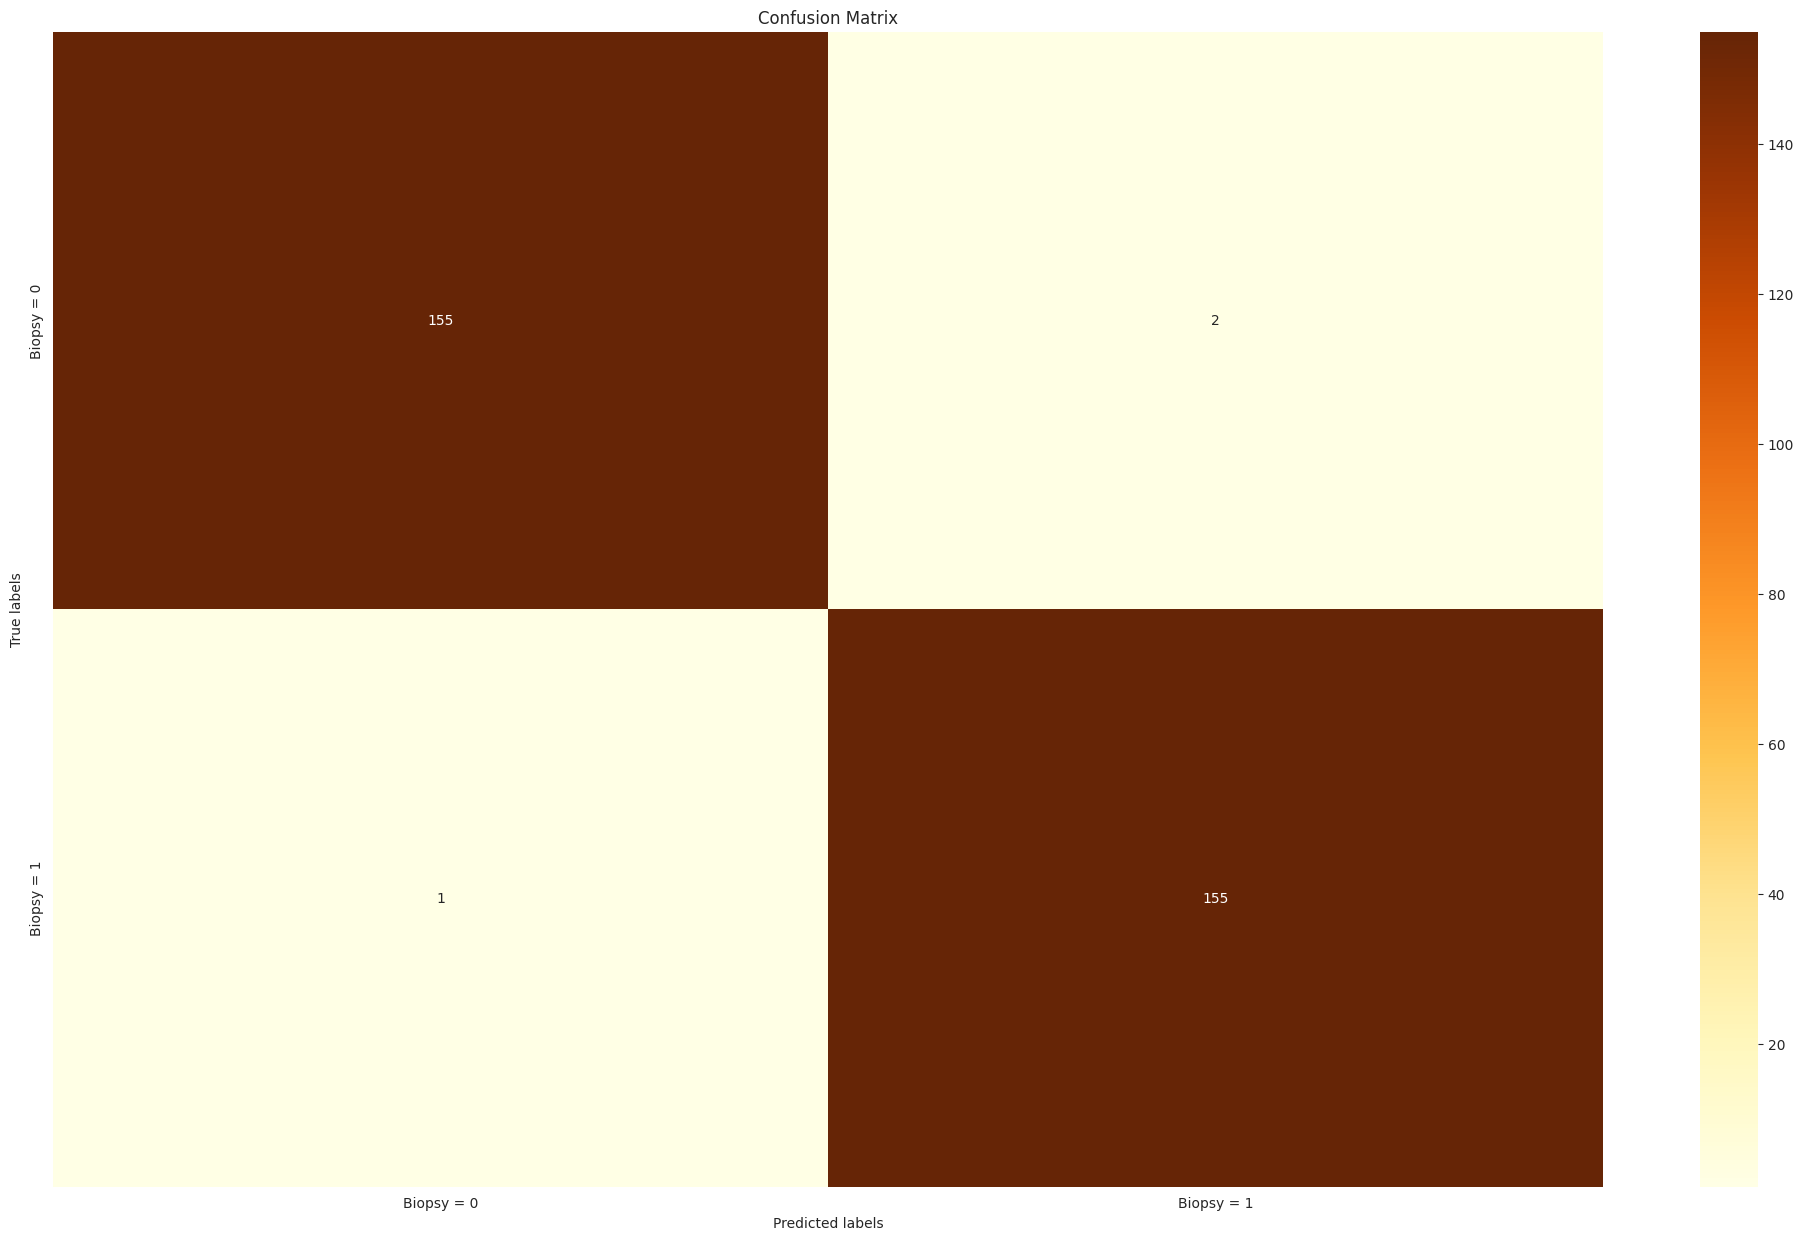

In [ ]:
#Confusion matrix:
conf_mat = confusion_matrix(y_true=y_test, y_pred = y_pred)
class_list = ['Biopsy = 0', 'Biopsy = 1']
fig, ax = plt.subplots(figsize=(25, 15))
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax,cmap='YlOrBr', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_list),
ax.yaxis.set_ticklabels(class_list)


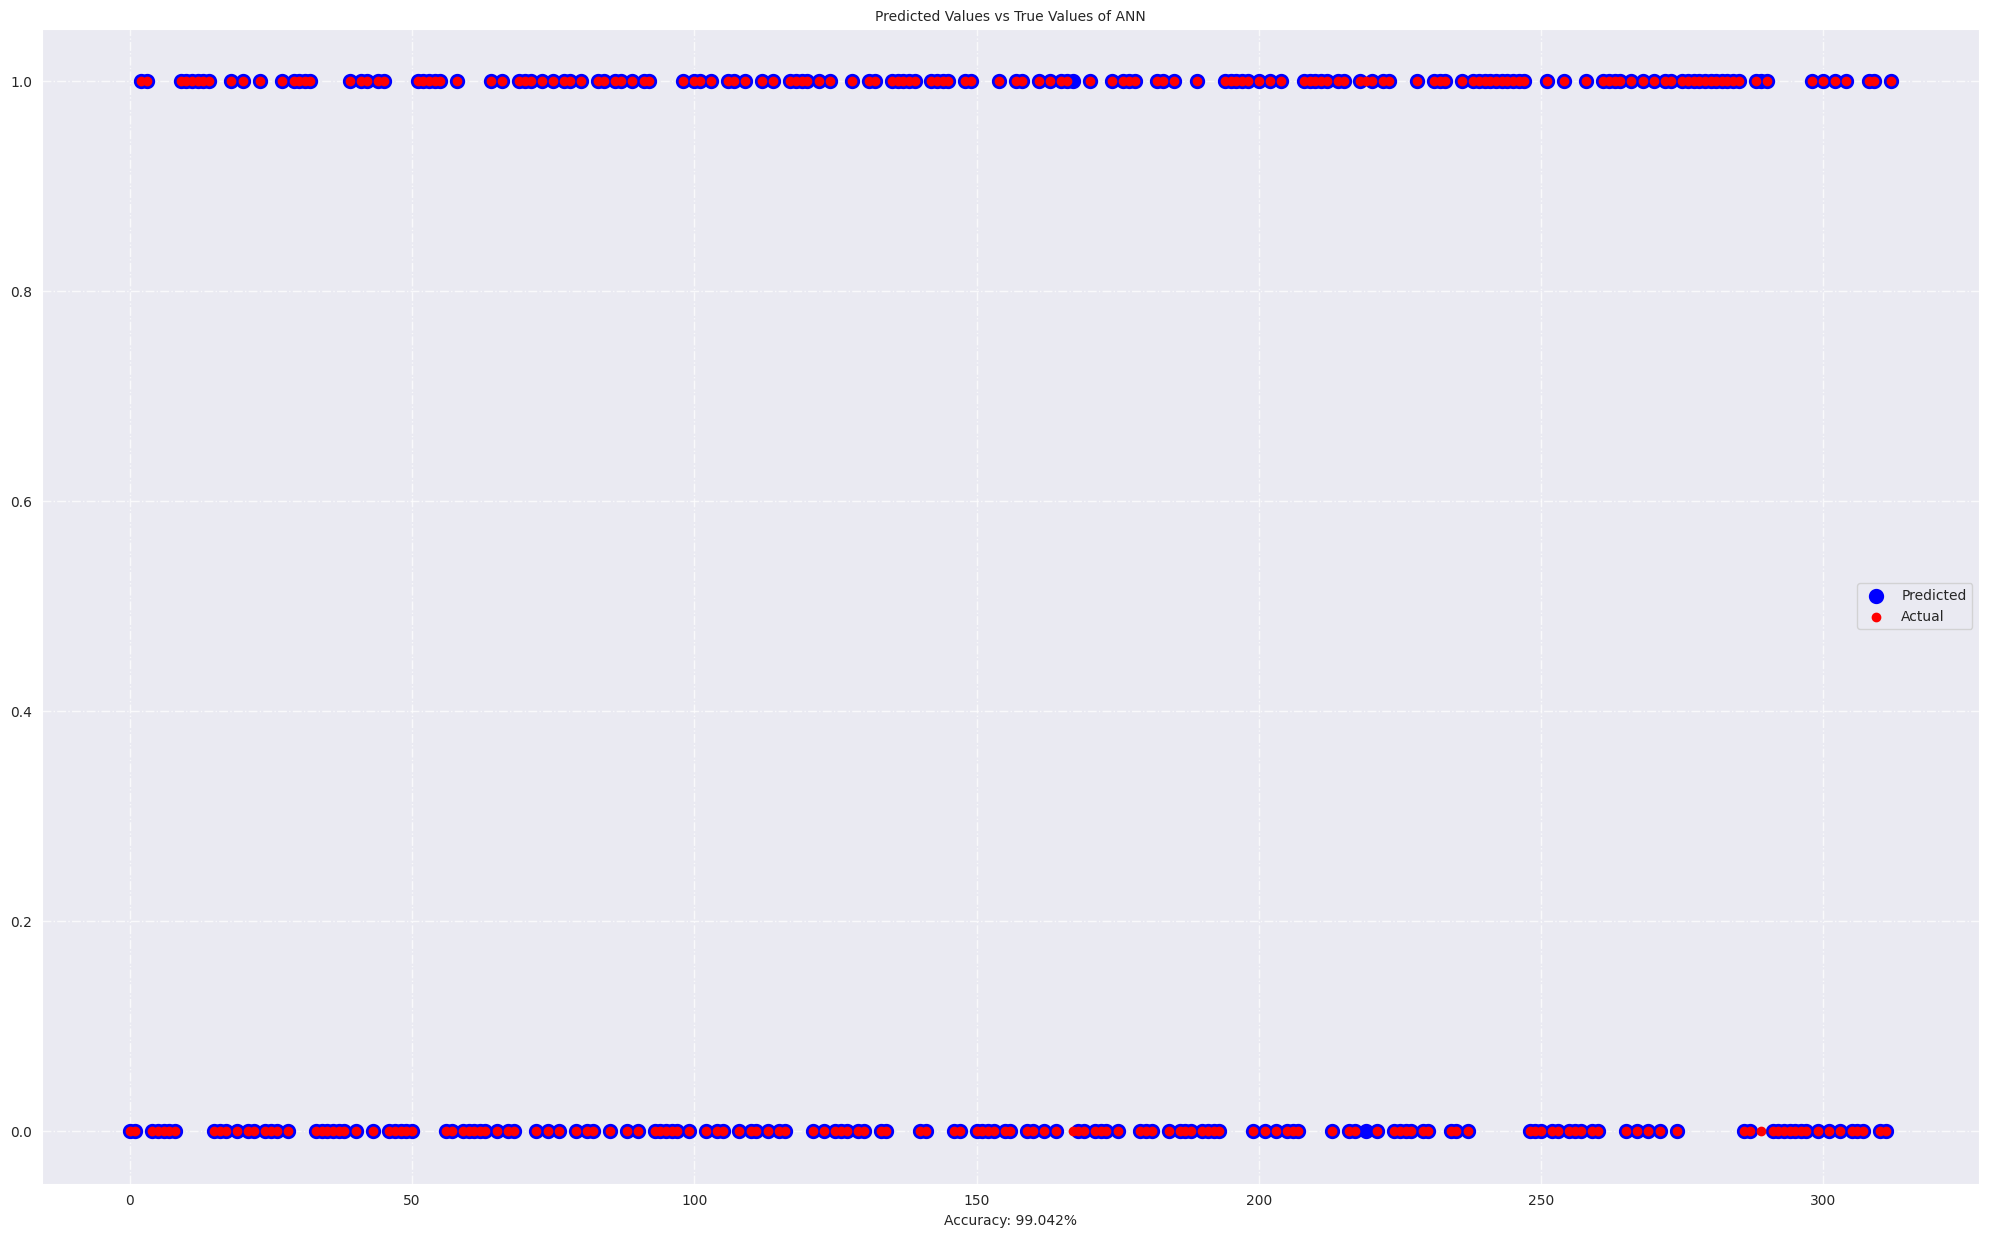

In [ ]:
def plot_real_pred_val(Y_test, ypred, name):
    plt.figure(figsize=(25,15))
    acc=accuracy_score(Y_test,ypred)
    plt.scatter(range(len(ypred)),ypred,color="blue",lw=5,label="Predicted")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Predicted Values vs True Values of " + name, fontsize=10)
    plt.xlabel("Accuracy: " + str(round((acc*100),3)) +"%")
    plt.legend()
    plt.grid(True, alpha=0.75, lw=1, ls='-.')
    plt.show()
plot_real_pred_val(y_test, y_pred, 'ANN')


# Cervical Cancer Using LSTM Model

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('Biopsy', axis =1).apply(pd.to_numeric, errors='coerce').astype('float64')
y = df["Biopsy"]
sm = SMOTE(random_state=42)
X,y = sm.fit_resample(X, y.ravel())
#Splits the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 2021, stratify=y)
#Standar scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Reshape the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1,X_test.shape[1])
# Create an LSTM model
lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(units=1,activation='sigmoid')
])
print(lstm_model.summary()) # Display the model summary
# Compile the LSTM model
lstm_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# Train the LSTM model
history = lstm_model.fit(X_train, y_train,
batch_size=64, validation_split=0.20, epochs=250,
shuffle=True)
# Save the LSTM model
lstm_model.save('cervical_lstm_model.h5')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          25,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,153 (98.25 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6207 - loss: 0.6757 - val_accuracy: 0.8840 - val_loss: 0.6184
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.6080 - val_accuracy: 0.8640 - val_loss: 0.5581
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8817 - loss: 0.5391 - val_accuracy: 0.8560 - val_loss: 0.5058
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8599 - loss: 0.5011 - val_accuracy: 0.8600 - val_loss: 0.4588
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8697 - loss: 0.4486 - val_accuracy: 0.8720 - val_loss: 0.4137
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8905 - loss: 0.4006 - val_accuracy: 0.8960 - val_loss: 0.3708
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8654 - loss: 0.3841 - val_accuracy: 0.9080 - val_loss: 0.3313
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9078 - loss: 0.3261 - val_accuracy: 0.92

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          25,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,461 (294.77 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,308 (196.52 KB)

None


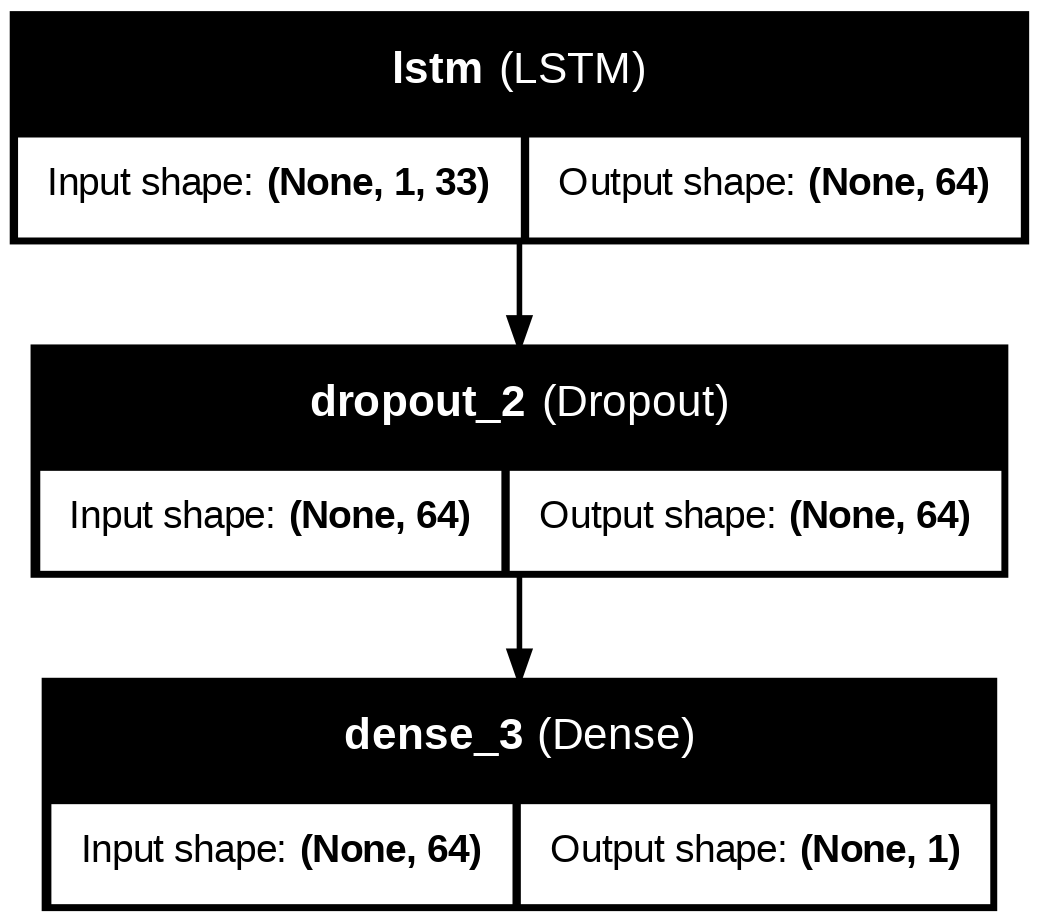

In [ ]:
# Display the model summary
print(lstm_model.summary())

# Visualize and save the architecture as an image
plot_model(lstm_model, to_file='lstm_model_architecture.png', show_shapes=True, show_layer_names=True, expand_nested=True)

# To display the image inline (if running in a Jupyter Notebook)
# from IPython.display import Image
# Image('lstm_model_architecture.png')

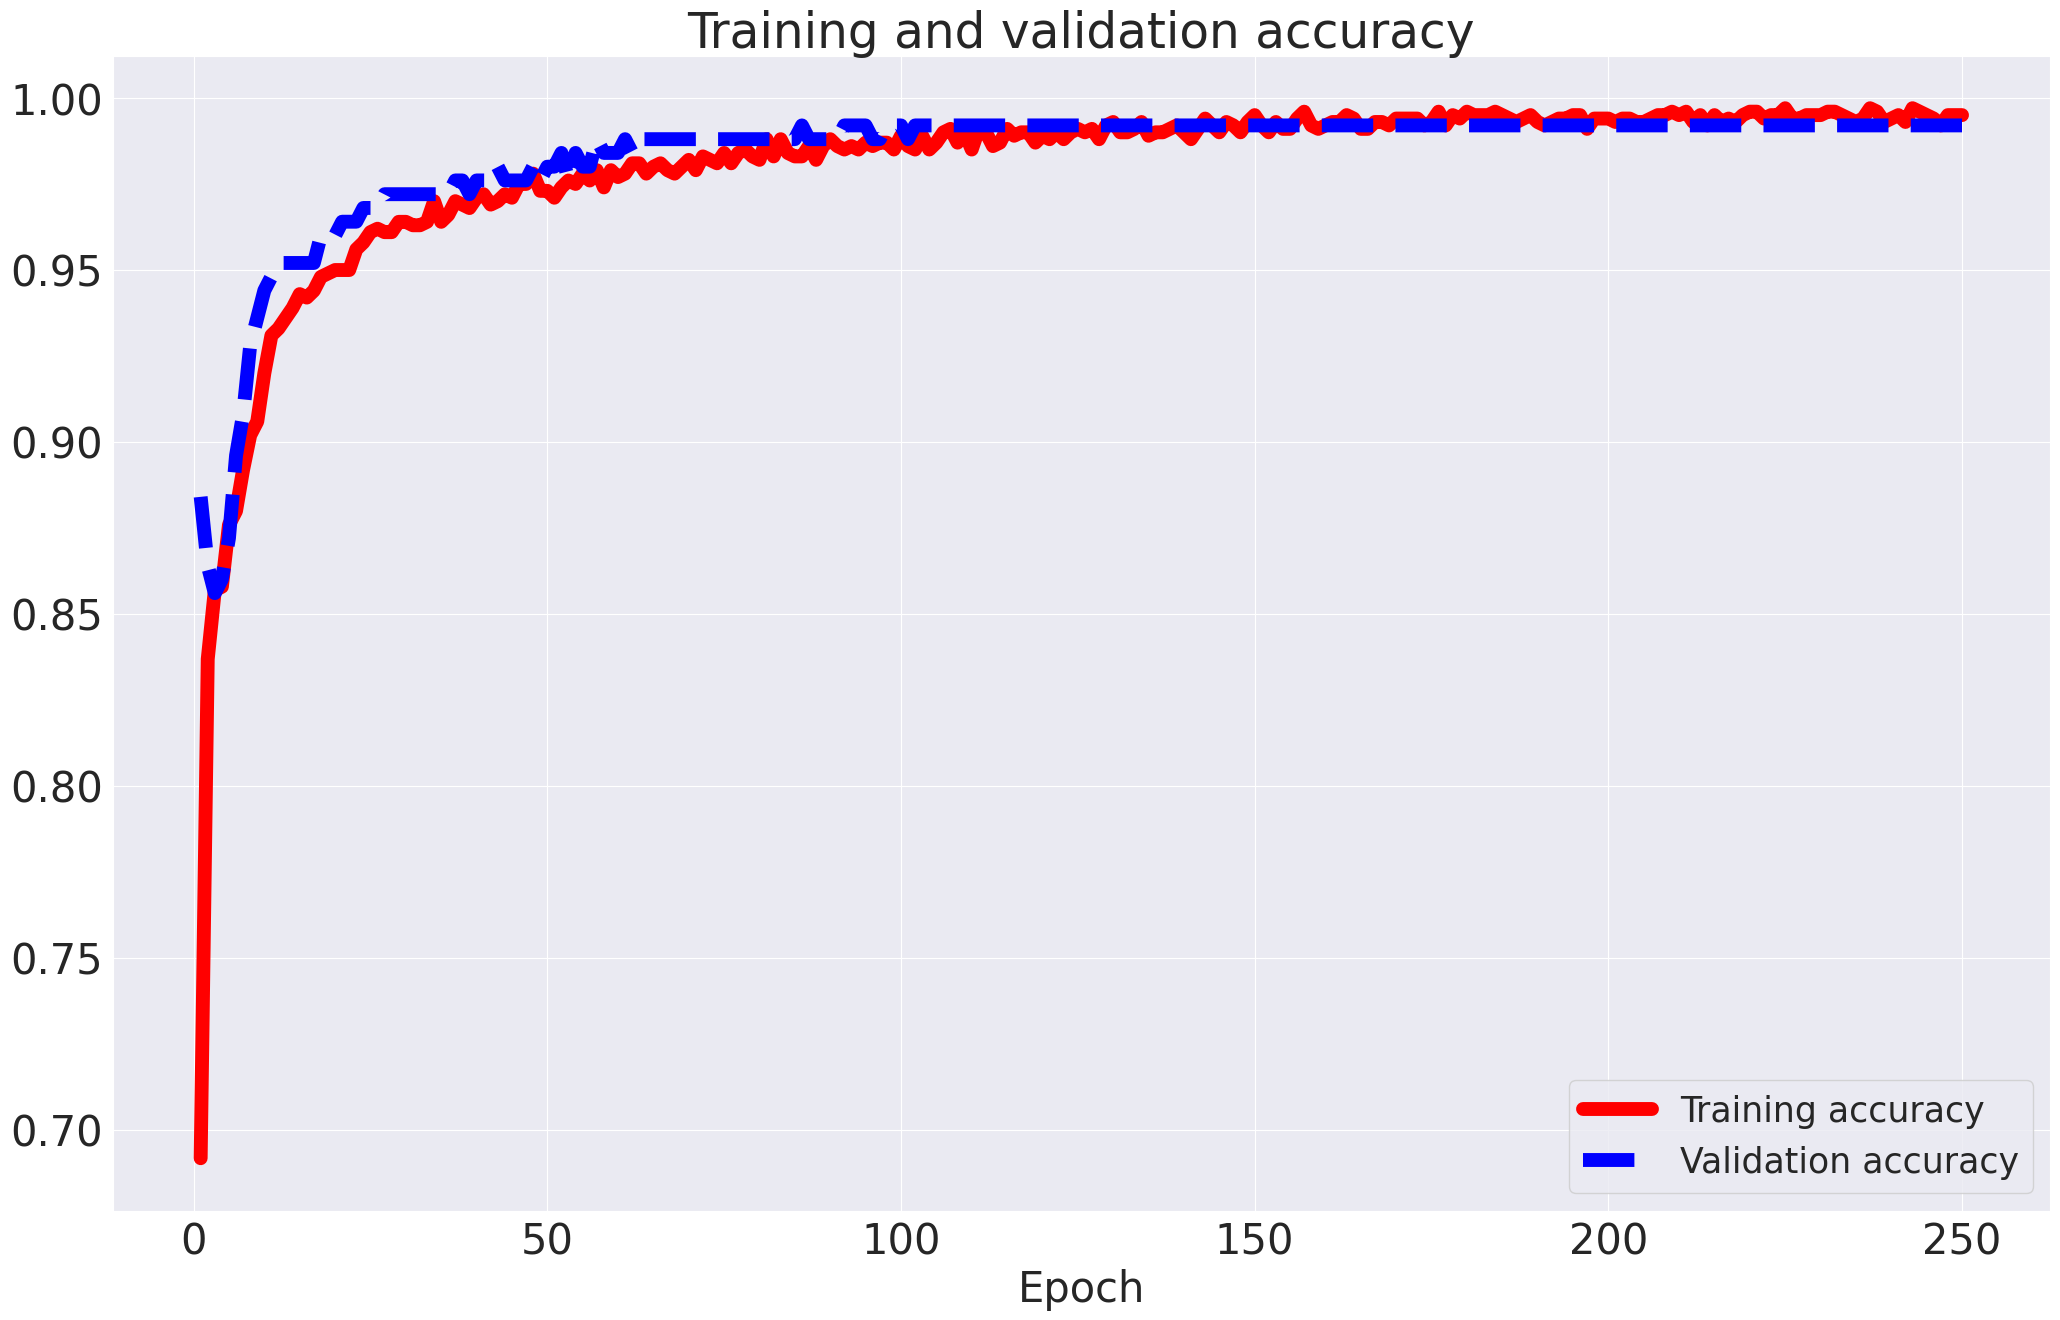

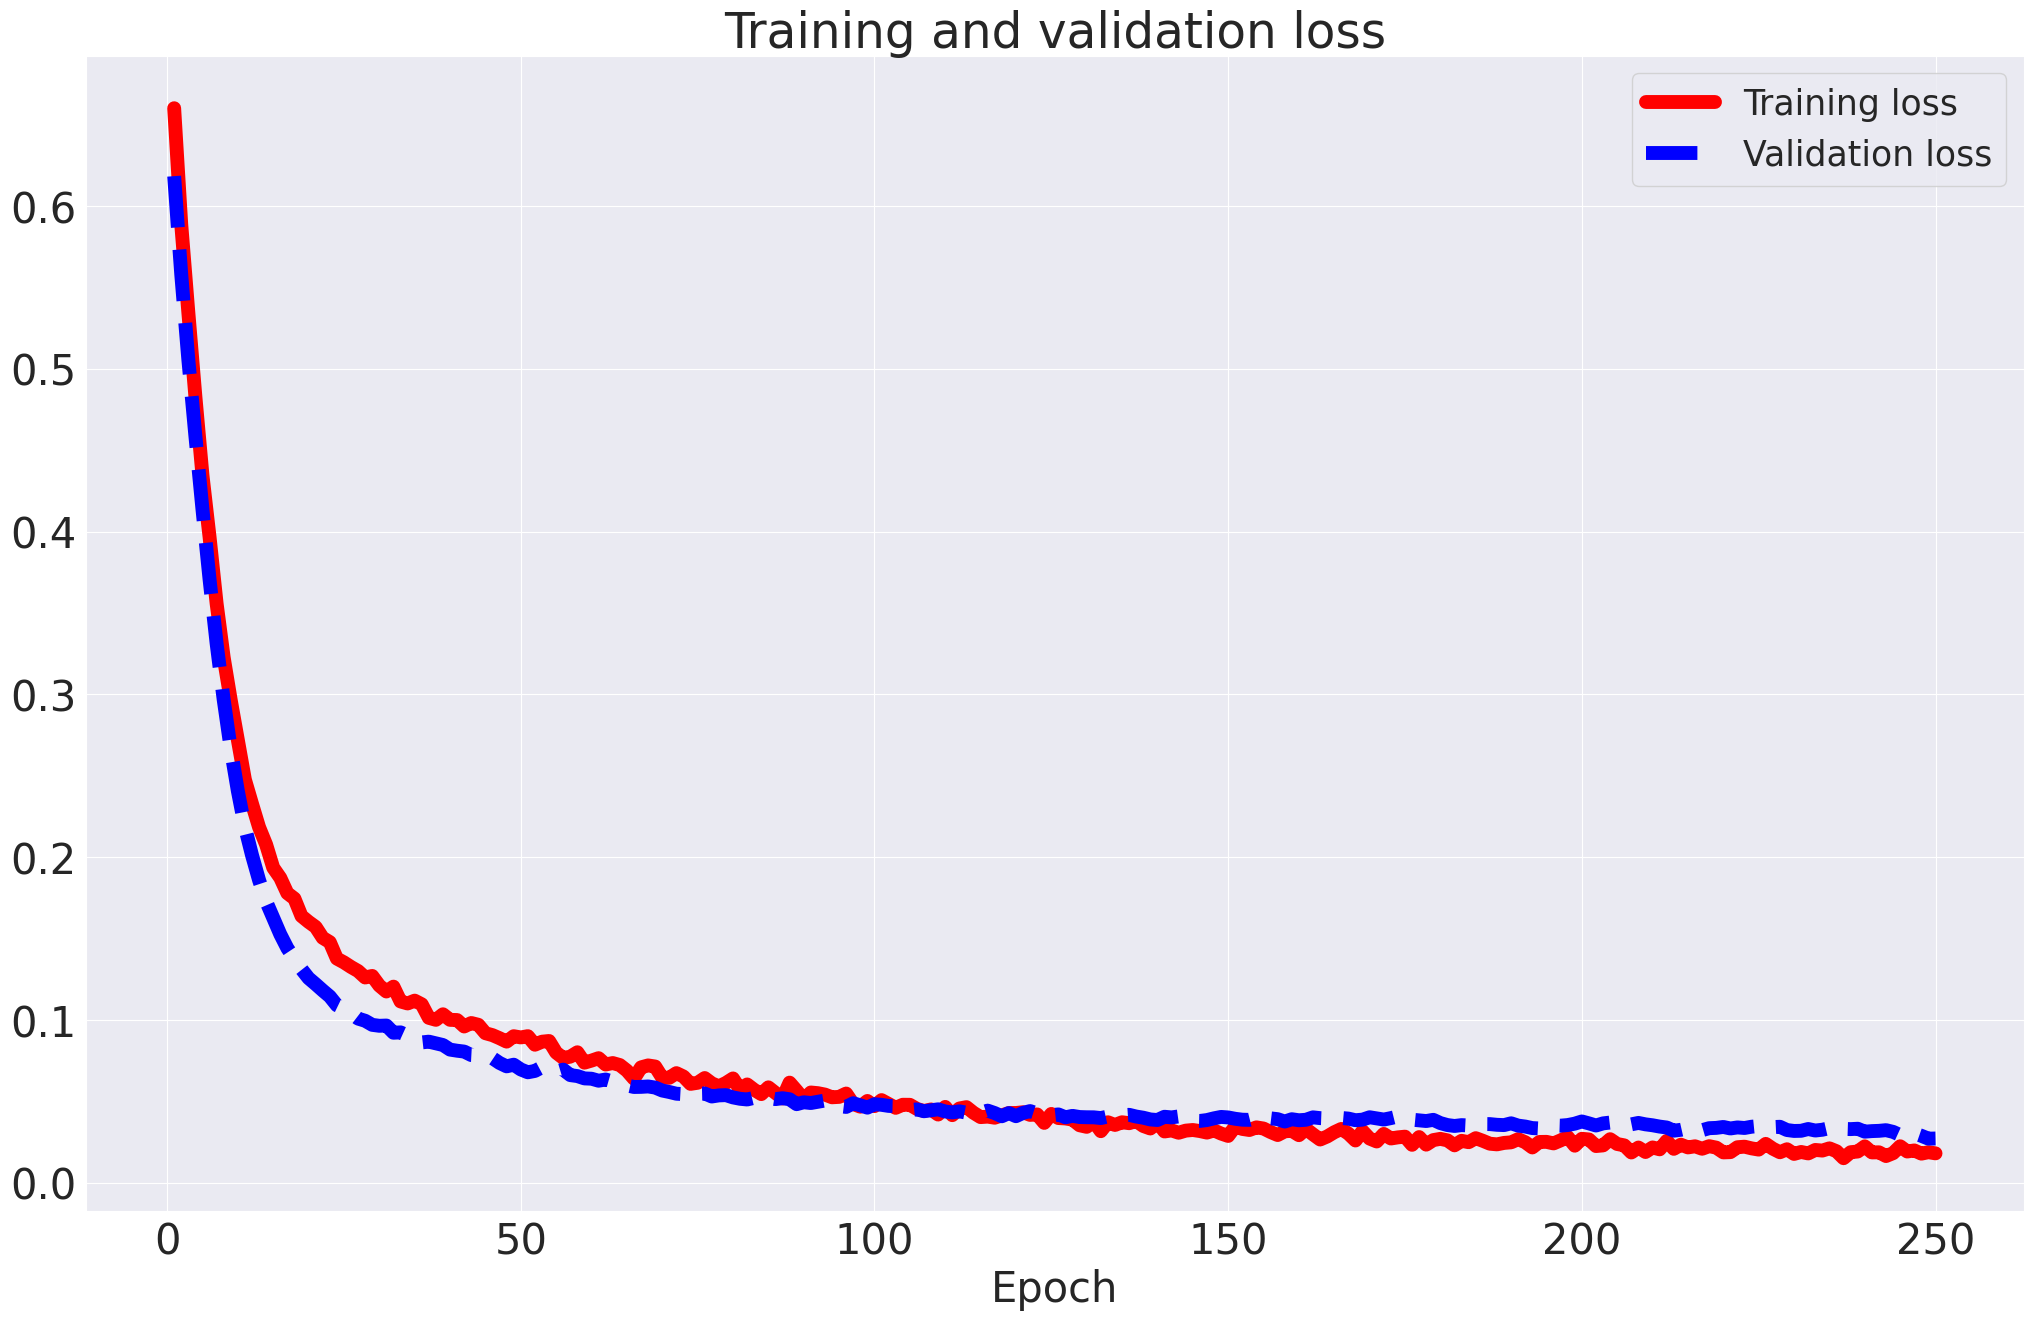

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
Accuracy Score :  0.

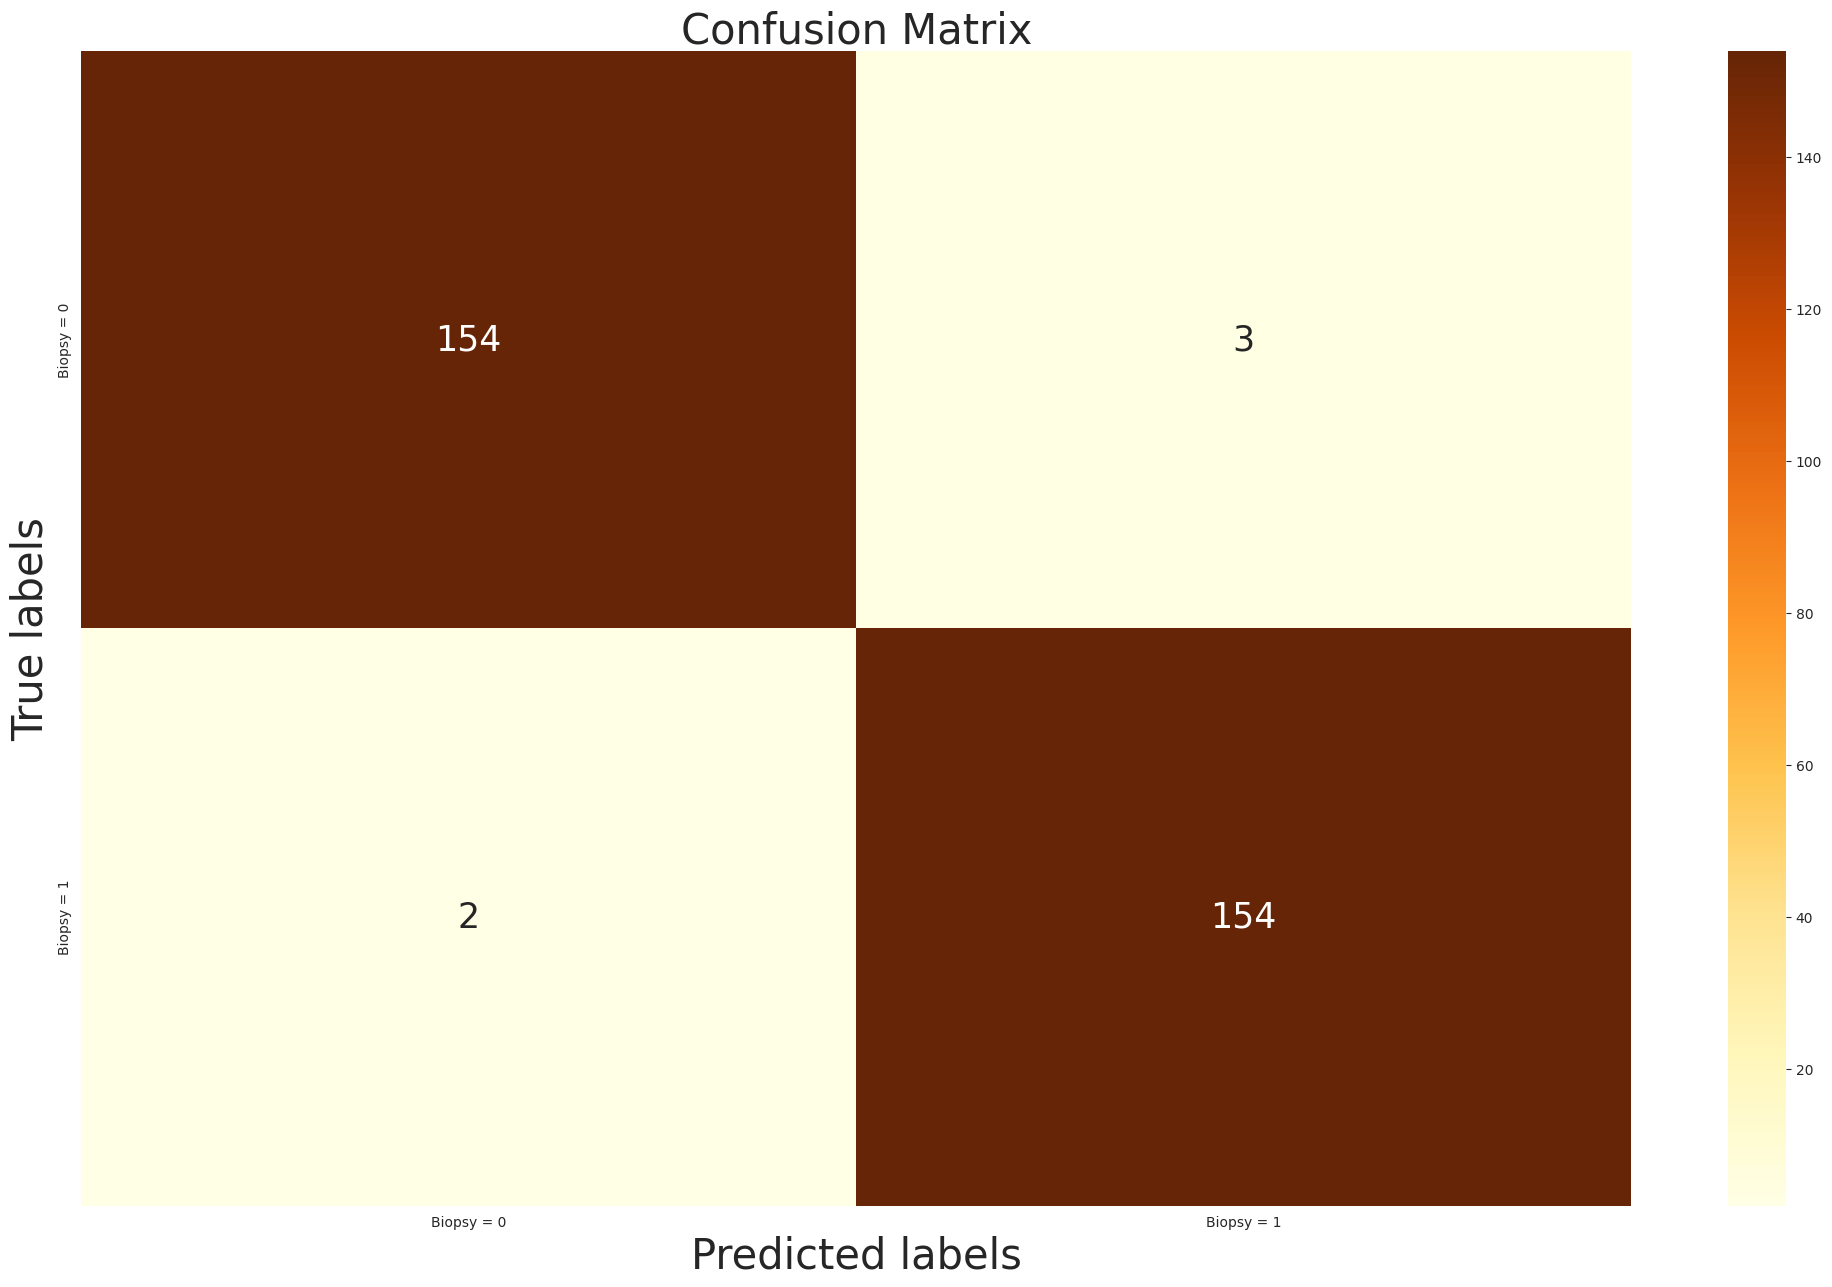

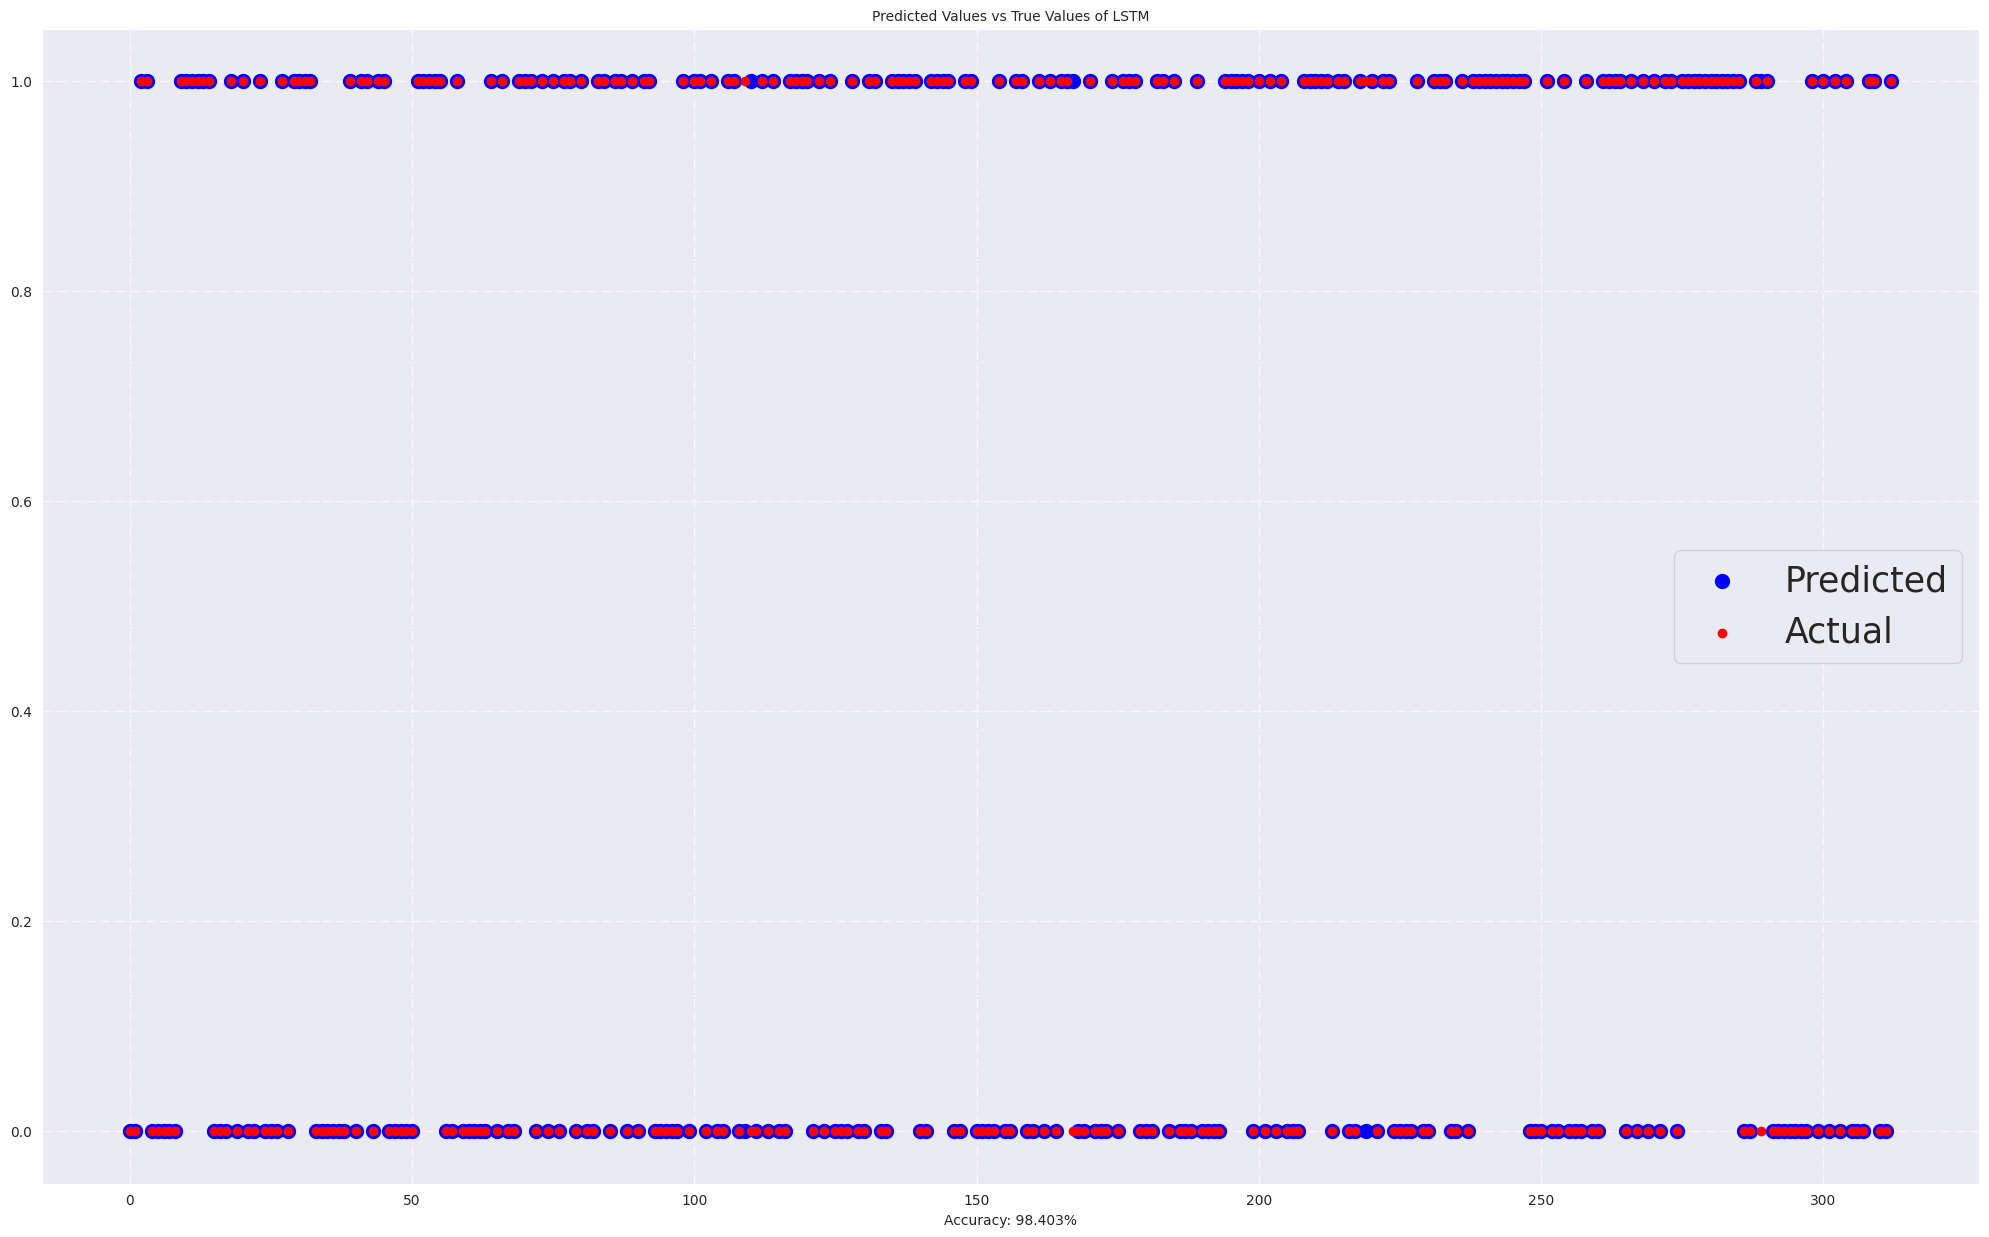

In [ ]:
#Plots accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#accuracy
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, acc, 'r', label='Training accuracy', lw=10)
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy', lw=10)
plt.title('Training and validation accuracy', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
#loss
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, loss, 'r', label='Training loss', lw=10)
plt.plot(epochs, val_loss, 'b--', label='Validation loss', lw=10)
plt.title('Training and validation loss', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
#Sets the threshold for the predictions. In this case, the threshold is 0.5(this value can be modified).
#prediction on test set
y_pred = lstm_model.predict(X_test)
y_pred = [int(p>=0.5) for p in y_pred]
print(y_pred)
#Performance Evaluation - Accuracy and Classification Report
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(y_pred, y_test,normalize=True), '\n')
#precision, recall report
print ('Classification Report :\n\n' ,classification_report(y_pred, y_test))
#Confusion matrix:
conf_mat = confusion_matrix(y_true=y_test, y_pred = y_pred)
class_list = ['Biopsy = 0', 'Biopsy = 1']
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(conf_mat, annot=True, ax = ax, cmap='YlOrBr', fmt='g',annot_kws={"size": 25})
ax.set_xlabel('Predicted labels', fontsize=30)
ax.set_ylabel('True labels', fontsize=30)
ax.set_title('Confusion Matrix', fontsize=30)
ax.xaxis.set_ticklabels(class_list), ax.yaxis.set_ticklabels(class_list)
def plot_real_pred_val(Y_test, ypred, name):
    plt.figure(figsize=(25,15))
    acc=accuracy_score(Y_test,ypred)
    plt.scatter(range(len(ypred)),ypred,color="blue",lw=5,label="Predicted")
    plt.scatter(range(len(Y_test)), Y_test,color="red",label="Actual")
    plt.title("Predicted Values vs True Values of " + name, fontsize=10)
    plt.xlabel("Accuracy: " + str(round((acc*100),3)) + "%")
    plt.legend(fontsize=25)
    plt.grid(True, alpha=0.75, lw=1, ls='-.')
    plt.show()
plot_real_pred_val(y_test, y_pred, 'LSTM')


# Cervical Cancer Using Deep Belief Networks (DBNs) Model


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 500)                 │          17,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,401 (458.60 KB)

 Trainable params: 117,401 (458.60 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7619 - loss: 0.6531 - val_accuracy: 0.9120 - val_loss: 0.4443
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8855 - loss: 0.3762 - val_accuracy: 0.9400 - val_loss: 0.1901
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9316 - loss: 0.2147 - val_accuracy: 0.9560 - val_loss: 0.1214
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9585 - loss: 0.1377 - val_accuracy: 0.9720 - val_loss: 0.0899
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9572 - loss: 0.1488 - val_accuracy: 0.9760 - val_loss: 0.0857
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9657 - loss: 0.1193 - val_accuracy: 0.9760 - val_loss: 0.0746
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9681 - loss: 0.1082 - val_accuracy: 0.9800 - val_loss: 0.0819
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9757 - loss: 0.1054 - val_accurac

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


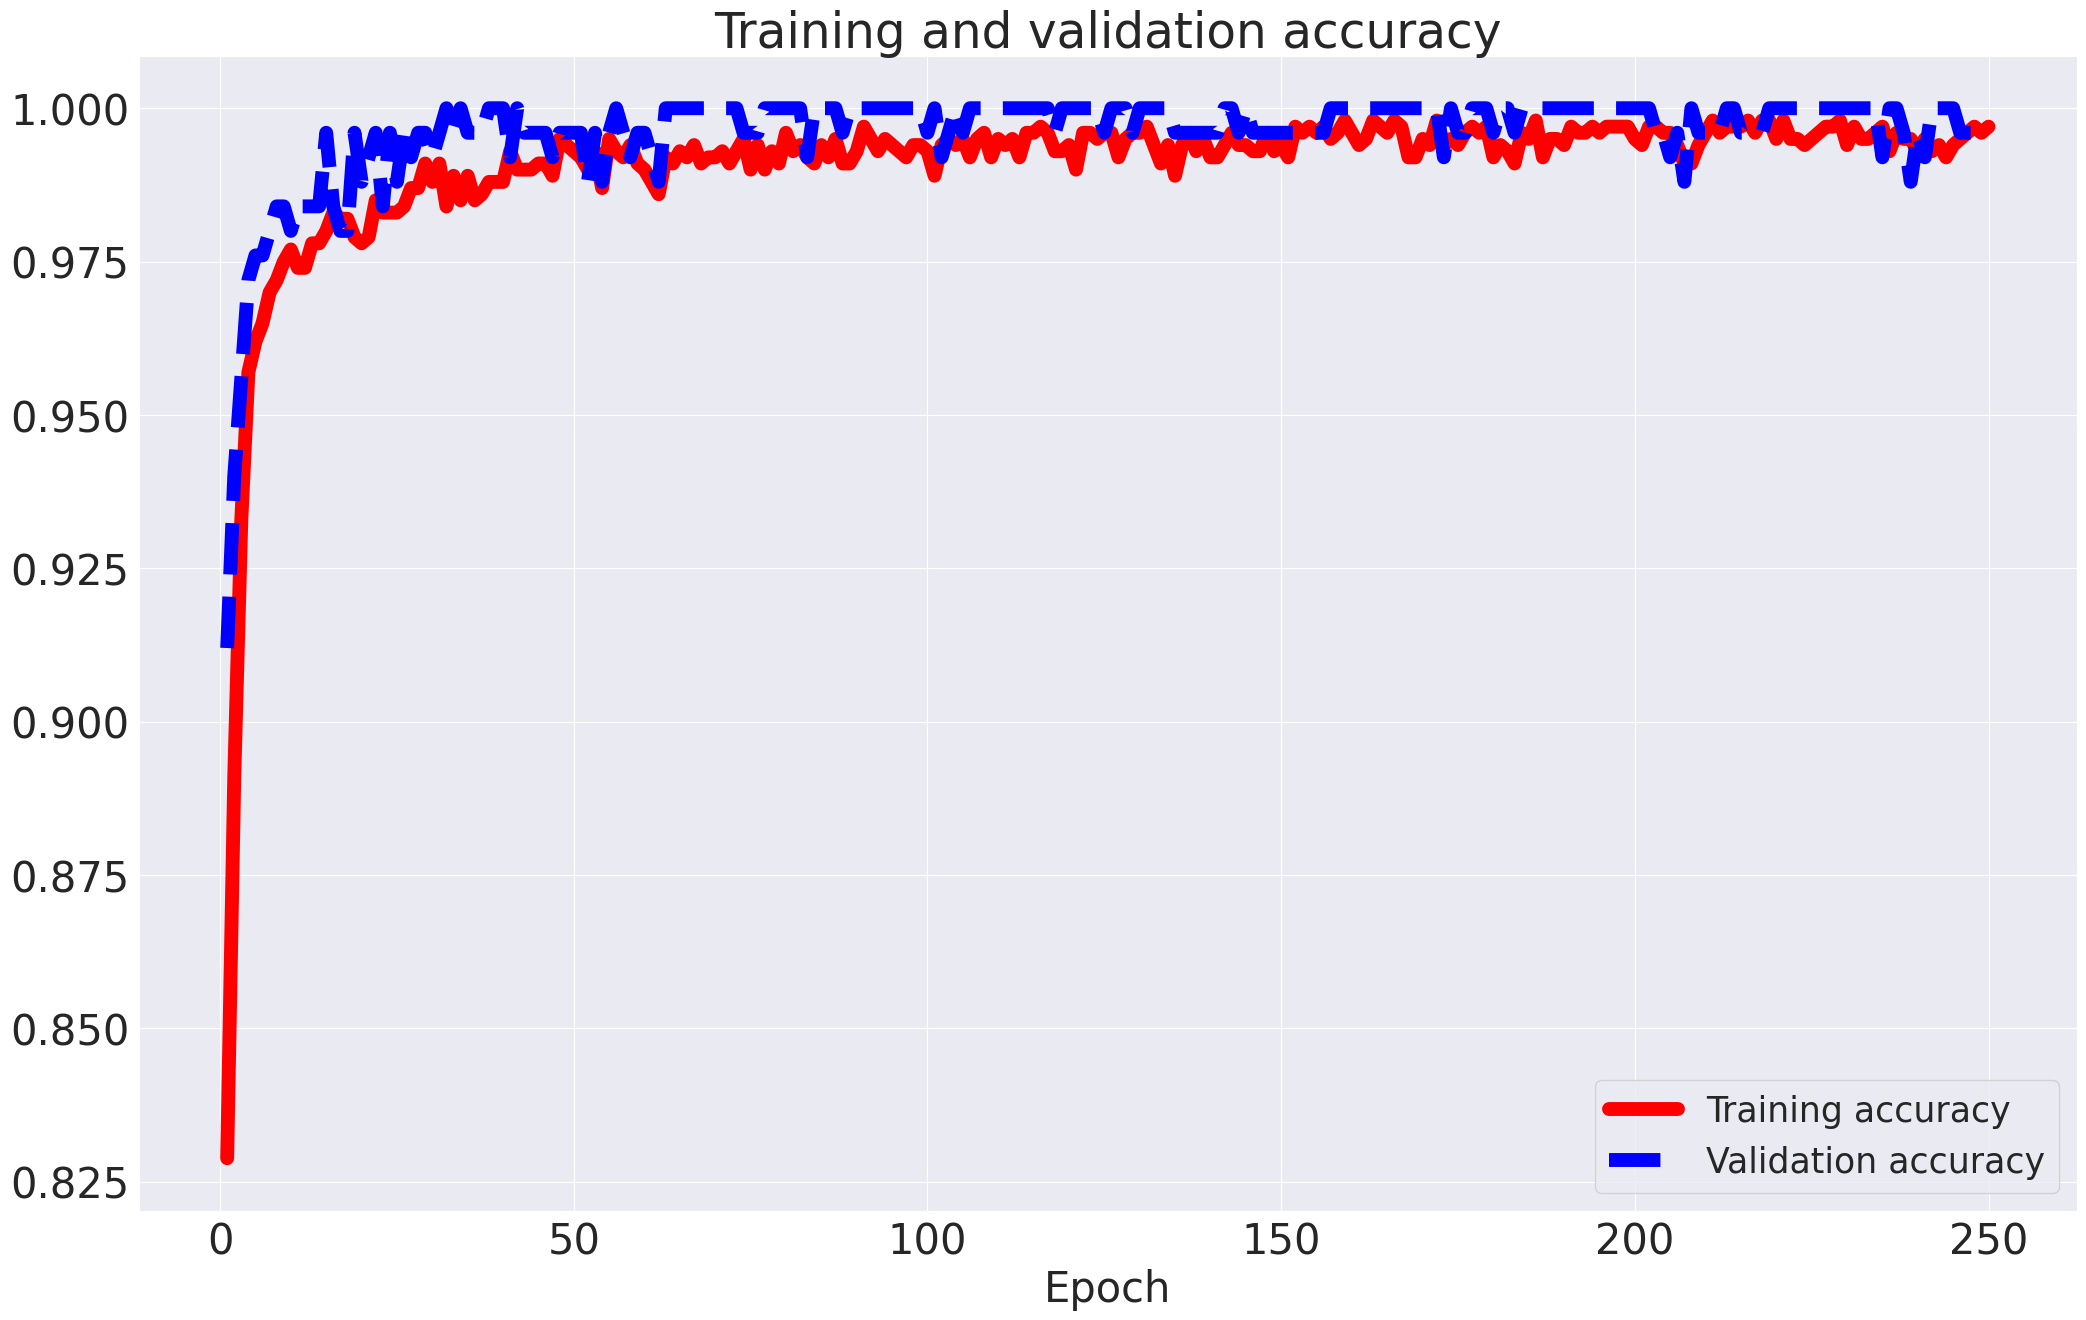

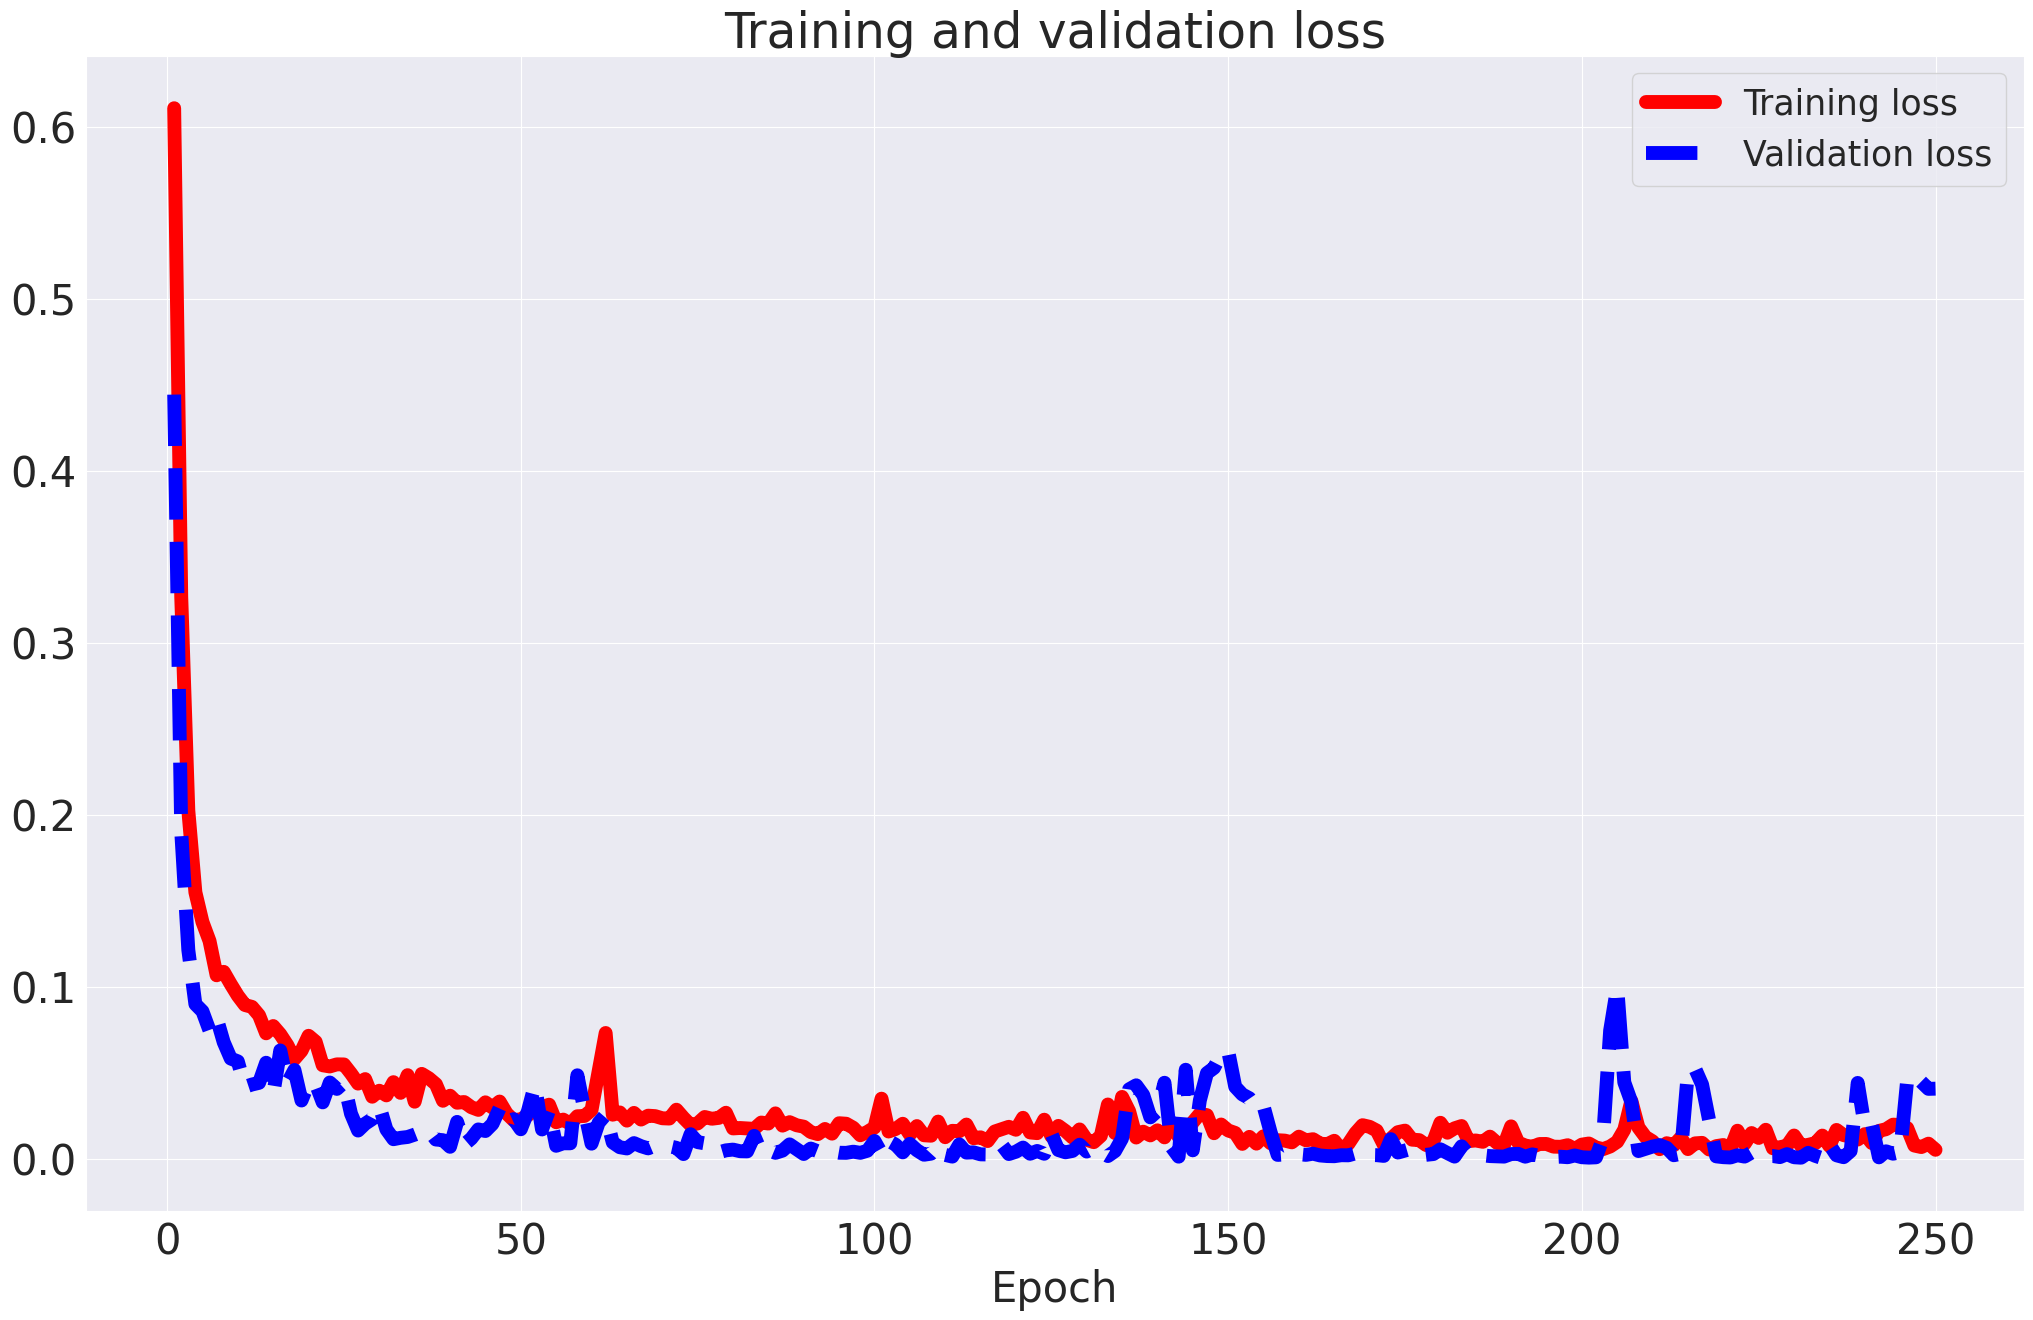

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
Accuracy Score :  0.

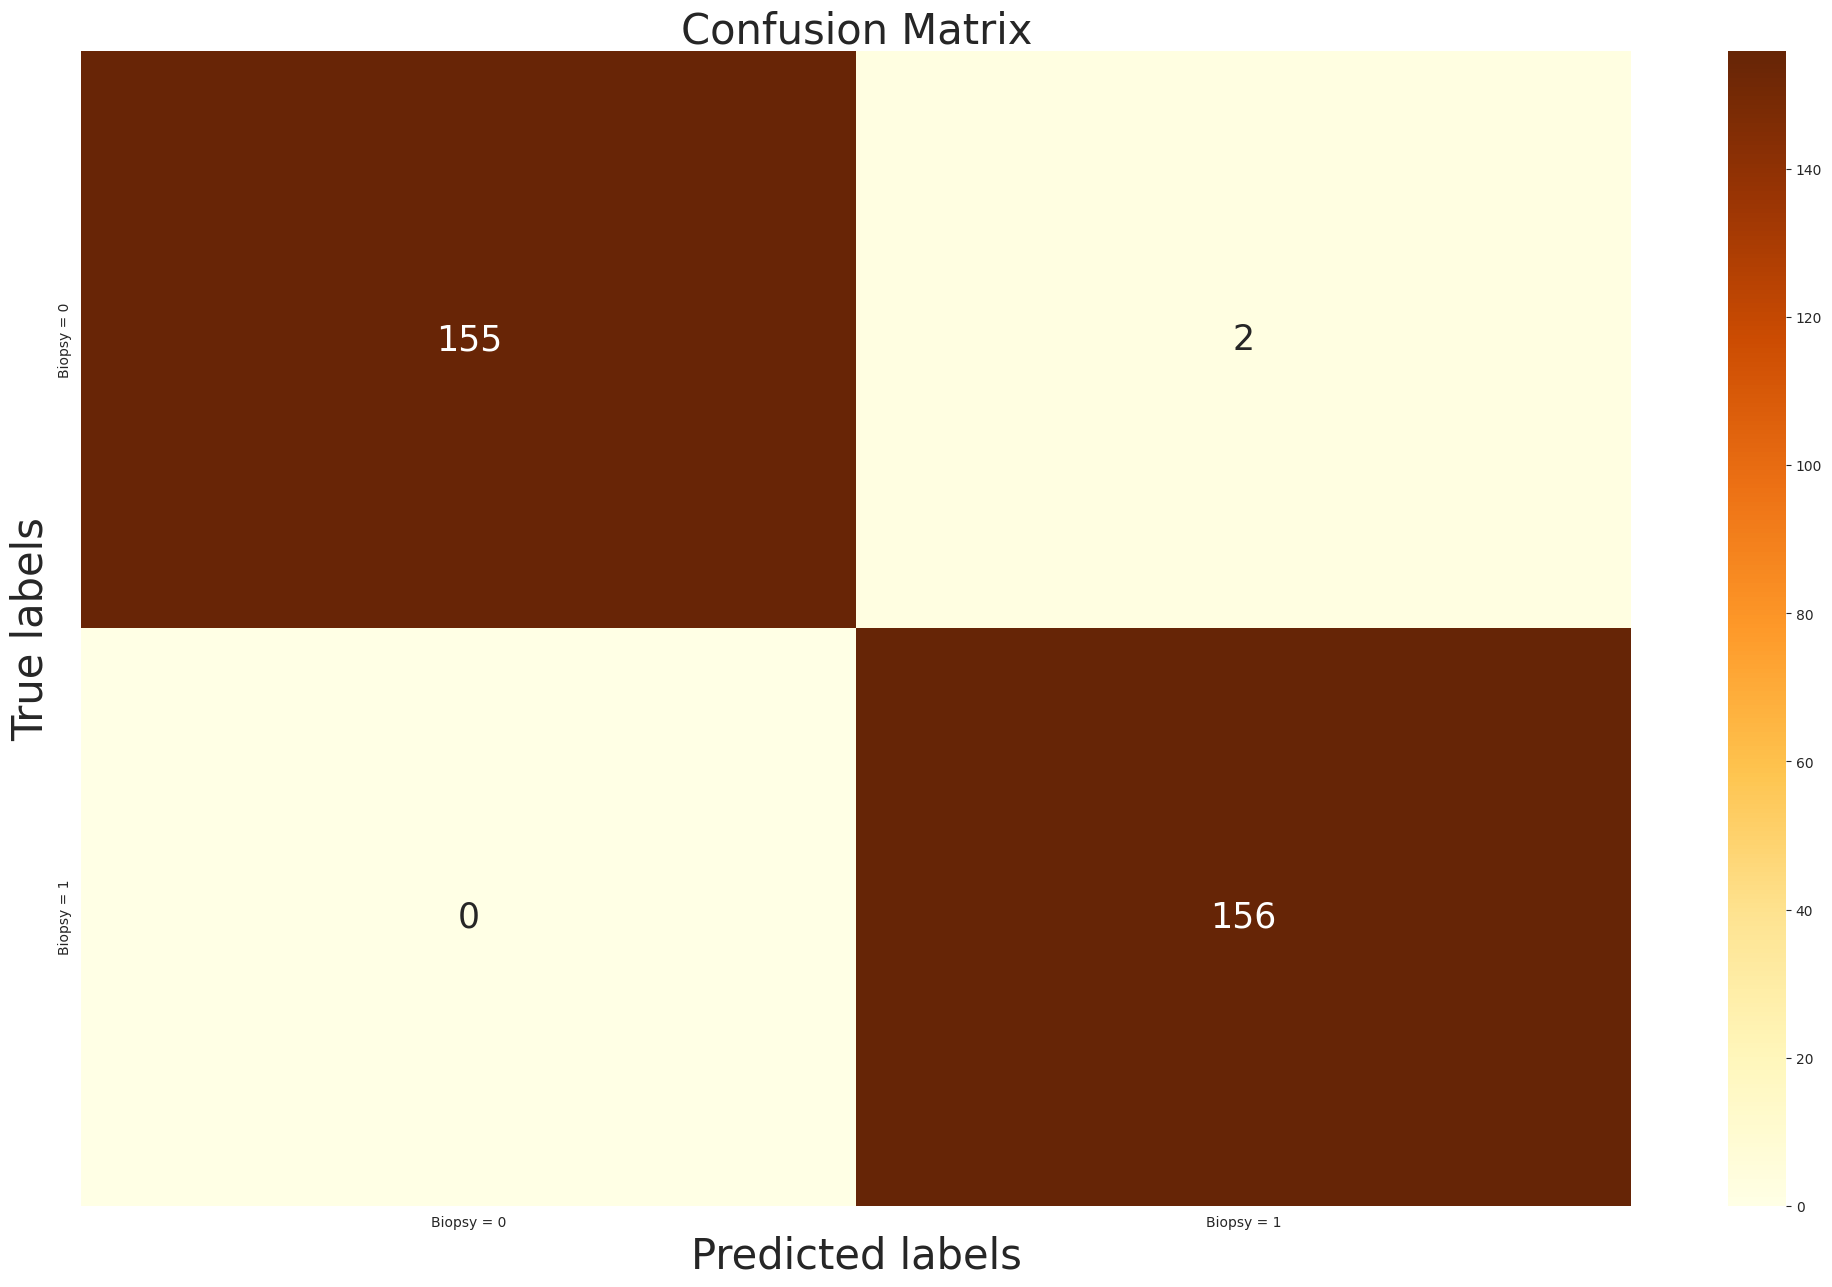

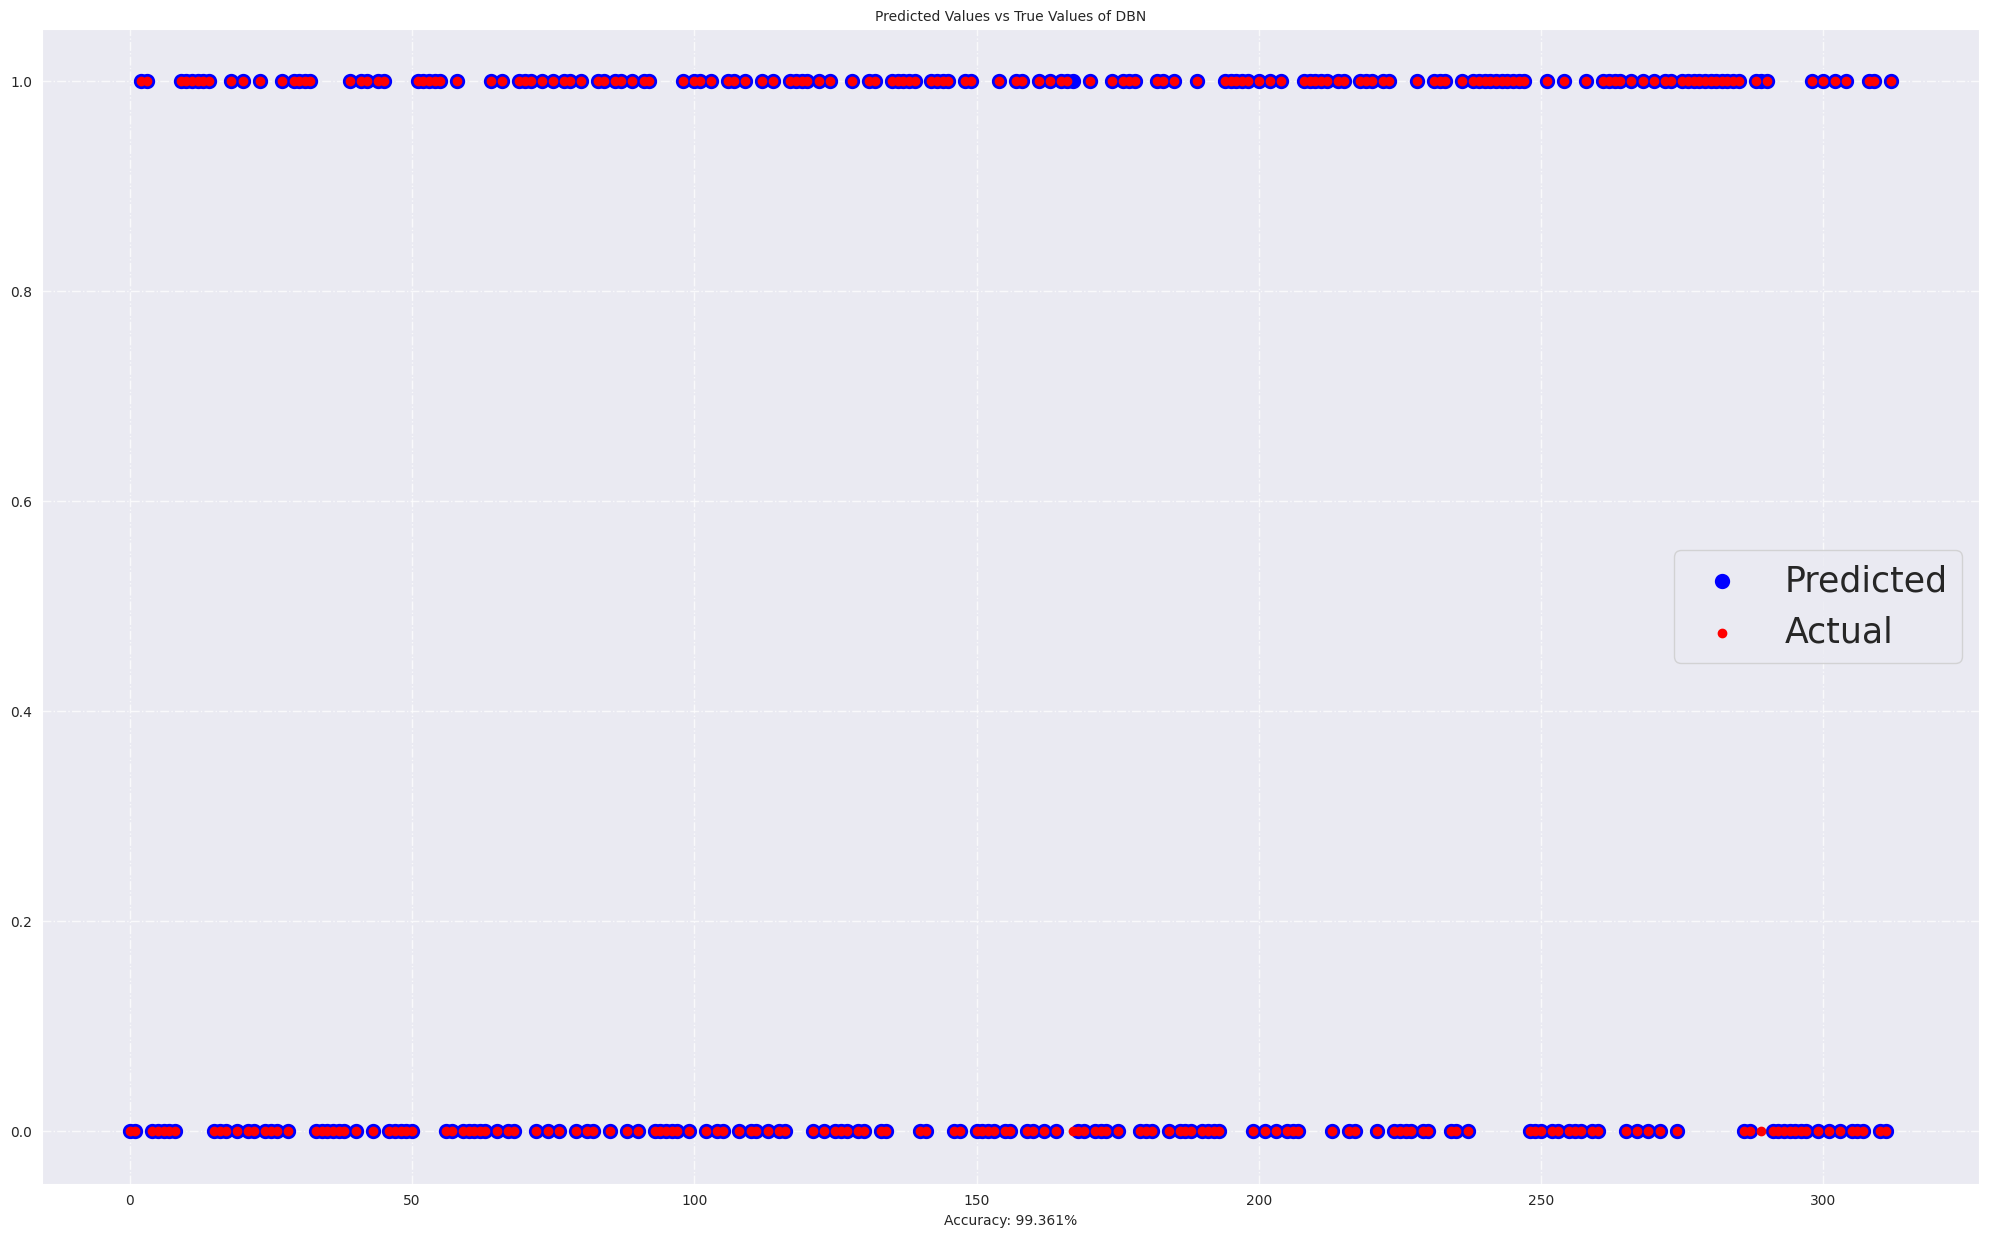

In [ ]:
X = df.drop('Biopsy', axis=1).apply(pd.to_numeric,
errors='coerce').astype('float64')
y = df["Biopsy"]
sm = SMOTE(random_state=42)
X,y = sm.fit_resample(X, y.ravel())
# Splits the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=2021, stratify=y)
# Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Create a Deep Belief Network (DBN)
dbn_model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(units=500, input_dim=33,kernel_initializer='uniform', activation='relu'),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(units=200, kernel_initializer='uniform',activation='relu'),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(units=1, kernel_initializer='uniform',activation='sigmoid')
])
print(dbn_model.summary()) # Display the model summary
# Compile the DBN model
dbn_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# Train the DBN model
history = dbn_model.fit(X_train, y_train, batch_size=64,validation_split=0.20, epochs=250, shuffle=True)
# Save the DBN model
dbn_model.save('cervical_dbn_model.h5')
# Save history into npy file
np.save('cervical_dbn_history.npy', history.history)
print(history.history.keys())
# Plots accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# Accuracy
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, acc, 'r', label='Training accuracy', lw=10)
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy', lw=10)
plt.title('Training and validation accuracy', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
# Loss
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, loss, 'r', label='Training loss', lw=10)
plt.plot(epochs, val_loss, 'b--', label='Validation loss', lw=10)
plt.title('Training and validation loss', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
# Sets the threshold for the predictions. In this case, the threshold is 0.5 (this value can be modified).
# Prediction on test set
y_pred = dbn_model.predict(X_test)
y_pred = [int(p>=0.5) for p in y_pred]
print(y_pred)
# Performance Evaluation - Accuracy and Classification Report
# Accuracy Score
print('Accuracy Score : ', accuracy_score(y_pred, y_test,normalize=True), '\n')
# Precision, recall report
print('Classification Report :\n\n', classification_report(y_pred,y_test))
# Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
class_list = ['Biopsy = 0', 'Biopsy = 1']
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(conf_mat, annot=True, ax=ax, cmap='YlOrBr',fmt='g', annot_kws={"size": 25})
ax.set_xlabel('Predicted labels', fontsize=30)
ax.set_ylabel('True labels', fontsize=30)
ax.set_title('Confusion Matrix', fontsize=30)
ax.xaxis.set_ticklabels(class_list),
ax.yaxis.set_ticklabels(class_list)

plot_real_pred_val(y_test, y_pred, 'DBN')
